In [1]:
import warnings                                  
warnings.filterwarnings('ignore')

import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import openpyxl

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.impute import SimpleImputer 
from sklearn.impute import KNNImputer

from sklearn.preprocessing import Normalizer, RobustScaler, MaxAbsScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from pandas.plotting import scatter_matrix


# Load the data

In [2]:
df = pd.read_csv('2018-19_NBA_salary.csv')

In [3]:
df

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Al Horford,27734405,Dominican Rep...,3,31,BOS,70,2219,17.5,0.577,...,14.3,18.4,3.8,3.8,7.6,0.164,1.1,3.0,4.1,3.4
481,Abdel Nader,1167333,Egypt,58,24,BOS,44,463,5.7,0.464,...,17.1,16.9,-0.6,0.7,0.0,0.004,-5.3,0.3,-5.0,-0.3
482,Aaron Harrison,83129,USA,62,23,DAL,7,164,6.6,0.411,...,3.9,14.4,-0.1,0.2,0.1,0.019,-3.2,0.3,-2.9,0.0
483,Aaron Gordon,5504420,USA,4,22,ORL,55,1838,16.6,0.531,...,9.7,24.5,1.1,1.9,3.0,0.078,0.1,-0.1,0.1,1.0


# Dealing with missing values

In [4]:
df.isnull().sum()

Player             0
Salary             0
NBA_Country        0
NBA_DraftNumber    0
Age                0
Tm                 0
G                  0
MP                 0
PER                0
TS%                2
3PAr               2
FTr                2
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               2
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM                0
VORP               0
dtype: int64

In [5]:
# using median value of each column to fill the N/A values, because it will not be influened by outliers.
def fillWithMedian(data):
    return data.fillna(data.median(), inplace=True)

fillWithMedian(df)


In [6]:
df.isnull().sum()

Player             0
Salary             0
NBA_Country        0
NBA_DraftNumber    0
Age                0
Tm                 0
G                  0
MP                 0
PER                0
TS%                0
3PAr               0
FTr                0
ORB%               0
DRB%               0
TRB%               0
AST%               0
STL%               0
BLK%               0
TOV%               0
USG%               0
OWS                0
DWS                0
WS                 0
WS/48              0
OBPM               0
DBPM               0
BPM                0
VORP               0
dtype: int64

# Dealing with data types

In [7]:
df.dtypes

Player              object
Salary               int64
NBA_Country         object
NBA_DraftNumber      int64
Age                  int64
Tm                  object
G                    int64
MP                   int64
PER                float64
TS%                float64
3PAr               float64
FTr                float64
ORB%               float64
DRB%               float64
TRB%               float64
AST%               float64
STL%               float64
BLK%               float64
TOV%               float64
USG%               float64
OWS                float64
DWS                float64
WS                 float64
WS/48              float64
OBPM               float64
DBPM               float64
BPM                float64
VORP               float64
dtype: object

Data types are all good.

# Dealing with duplicate data

In [8]:
df['Player'].duplicated().sum()

2

In [9]:
df.drop_duplicates(subset=['Player'],keep='first',inplace=True)

In [10]:
df['Player'].duplicated().sum()

0

In [11]:
df.index = range(0,483)

# New feature: Award

In [12]:
award_list = ['James Harden', 'Ben Simmons', 'Lou Williams', 'Victor Oladipo', 'James Harden', 'Anthony Davis', 
        'LeBron James', 'Damian Lillard', 'Kevin Durant', 'Giannis Antetokounmpo', 'Russell Westbrook', 
       'Joel Embiid', 'LaMarcus Aldridge', 'DeMar DeRozan', 'Stephen Curry', 'Karl-Anthony Towns', 'Jimmy Butler',
       'Paul George']


In [13]:
# add a new column
df['Award'] = 0

In [14]:
# Change the value from 0 to 1 for player from award_list in the dataframe
for i in range(len(df)):
    if df.loc[i,'Player'] in award_list:
        df.loc[i,'Award'] = 1
    else:
        continue


In [15]:
# convert data type to int
df['Award'] = df['Award'].astype(int)

#  Nomial  for classification prediction

In [16]:
# Creating Features
# build nomial categories
# 0 - edge players
# 1 - normal players
# 2 - all stars
# 3 - superstars

conditions = [
        (df['Salary'] < 5000000),
        (df['Salary'] <= 10000000),
        (df['Salary'] <= 20000000)]
choices = [0, 1, 2]
df['Nominal'] = np.select(conditions, choices, default=3)

df.head()


,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Award,Nominal
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,...,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,0,0
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,...,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,0,0
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,...,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,0,2
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,...,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,0,0
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,...,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,0,0


# Data exploration

Check of unfolding.

In [17]:
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', None)
display(df.head(10))

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Award,Nominal
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2,0,0
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7,0,0
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0,0,2
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1,0,0
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2,0,0
5,Yogi Ferrell,1312611,USA,62,24,DAL,79,2238,11.5,0.543,0.489,0.141,1.3,11.3,6.1,13.3,1.4,0.3,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,0.6,0,0
6,Xavier Silas,74159,USA,62,30,BOS,2,7,-4.9,0.000,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,0.0,0,0
7,Xavier Rathan-Mayes,46080,Canada,62,23,MEM,5,118,0.9,0.315,0.333,0.214,0.0,5.0,2.5,23.2,2.6,2.4,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,-0.3,0,0
8,Wilson Chandler,12016854,USA,23,30,DEN,70,2200,11.1,0.543,0.390,0.186,5.0,14.0,9.5,9.7,0.9,1.4,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,0.5,0,2
9,Willy Hernangomez,1435750,Spain,35,23,TOT,45,430,20.6,0.592,0.075,0.555,13.6,25.2,19.3,11.0,1.8,2.8,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,0.3,0,0


In [18]:
df.shape

(483, 30)

In [19]:
df.columns

Index(['Player', 'Salary', 'NBA_Country', 'NBA_DraftNumber', 'Age', 'Tm', 'G',
       'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%',
       'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/48', 'OBPM',
       'DBPM', 'BPM', 'VORP', 'Award', 'Nominal'],
      dtype='object')

In [20]:
df.describe()

,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Award,Nominal
count,4.830000e+02,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000,483.000000
mean,6.658553e+06,29.349896,26.281573,50.314700,1158.360248,13.302277,0.536068,0.337673,0.263619,4.889234,14.968530,9.925466,12.907246,1.531263,1.717598,13.119048,18.858799,1.283023,1.180952,2.467495,0.081017,-1.240994,-0.477433,-1.718634,0.602484,0.035197,0.734990
std,7.399948e+06,21.110157,4.272295,24.819856,810.375861,8.763635,0.111907,0.226860,0.294535,4.585957,6.856097,4.959441,9.109332,0.991225,1.685883,6.108467,5.922471,1.881655,1.034393,2.672412,0.162494,5.015302,2.386904,5.636012,1.246886,0.184468,1.006286
min,4.608000e+04,1.000000,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,-1.300000,0.000000,0.000000
25%,1.471382e+06,10.500000,23.000000,29.500000,385.000000,9.800000,0.506000,0.167000,0.155000,1.800000,10.200000,6.200000,6.900000,1.000000,0.600000,9.900000,15.000000,0.000000,0.300000,0.300000,0.040500,-2.600000,-1.600000,-3.500000,-0.100000,0.000000,0.000000
50%,3.218280e+06,24.000000,26.000000,59.000000,1151.000000,13.200000,0.545000,0.346000,0.231000,3.300000,14.000000,8.700000,9.800000,1.500000,1.200000,12.500000,17.900000,0.800000,1.000000,1.900000,0.083000,-1.100000,-0.400000,-1.300000,0.100000,0.000000,0.000000
75%,1.000000e+07,47.000000,29.000000,71.000000,1824.500000,16.550000,0.582500,0.481000,0.319500,7.050000,18.800000,13.300000,17.150000,1.900000,2.200000,15.600000,22.200000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.550000,0.900000,0.000000,1.000000
max,3.468255e+07,62.000000,41.000000,79.000000,2898.000000,134.100000,1.500000,1.000000,5.333000,35.900000,37.600000,26.500000,49.400000,12.500000,13.400000,66.700000,45.100000,11.400000,5.600000,15.000000,2.713000,68.700000,6.800000,54.400000,8.600000,1.000000,3.000000


In [21]:
# Top 10 players and their player efficiency & Player age
df.sort_values("Salary",ascending=False)[['Player', 'Salary', 'Age', 'PER']][0:10]


,Player,Salary,Age,PER
69,Stephen Curry,34682550,29,28.2
193,LeBron James,33285709,33,28.5
113,Paul Millsap,31269231,32,18.2
325,Gordon Hayward,29727900,27,7.4
449,Blake Griffin,29512900,28,19.6
204,Kyle Lowry,28703704,31,19.6
88,Russell Westbrook,28530608,29,25.0
153,Mike Conley,28530608,30,15.5
293,James Harden,28299399,28,30.2
384,DeMar DeRozan,27739975,28,21.3


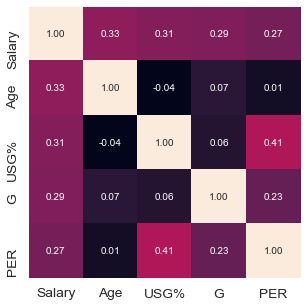

In [81]:
# Explore the relationship between 'salary', 'age', 'g', 'per', 'USG%'
cm = df[['Salary', 'Age', 'G', 'PER', 'USG%']][cols].corr()
f, ax = plt.subplots(figsize=(5, 5))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [23]:
# USG% top 10 players
df.sort_values("USG%",ascending=False)[["Player","Salary","USG%"]][0:10]

,Player,Salary,USG%
142,Naz Mitrou-Long,92160,45.1
224,Kay Felder,1312611,44.2
147,Mindaugas Kuzminskas,3025035,43.6
19,Vince Hunter,50000,38.5
293,James Harden,28299399,36.2
394,David Stockton,148318,35.8
88,Russell Westbrook,28530608,34.3
259,Joel Embiid,6100266,33.5
383,DeMarcus Cousins,18063850,31.9
372,Devin Booker,2319360,31.6


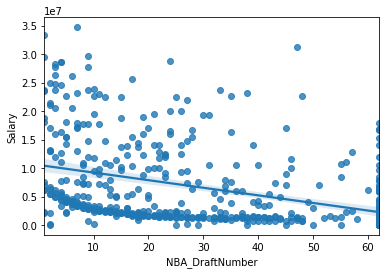

In [24]:
# Relationship between salary and draft ranking
ax=sns.regplot(x='NBA_DraftNumber',y='Salary',data=df)

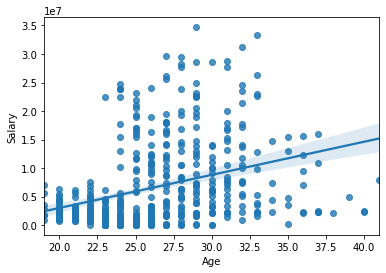

In [25]:
# Relationship between age and annual salary
ax=sns.regplot(x='Age',y='Salary',data=df)

Text(0, 0.5, 'Frequency')

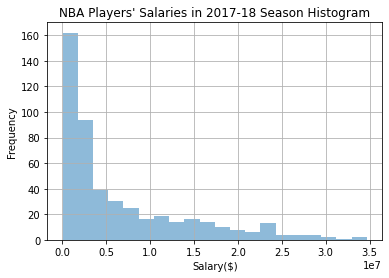

In [26]:
# Number of players with different salaries
df.Salary.hist(bins=20, alpha=0.5)
plt.title("NBA Players' Salaries in 2017-18 Season Histogram")
plt.xlabel("Salary($)")
plt.ylabel("Frequency")

In [27]:
# average salary
np.mean(df.Salary)

6658552.619047619

Text(0, 0.5, 'Number of people')

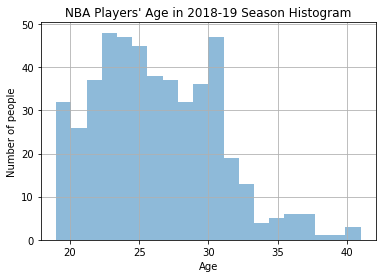

In [28]:
# Number of players of different ages
df.Age.hist(bins=20, alpha=0.5)
plt.title("NBA Players' Age in 2018-19 Season Histogram")
plt.xlabel("Age")
plt.ylabel("Number of people")

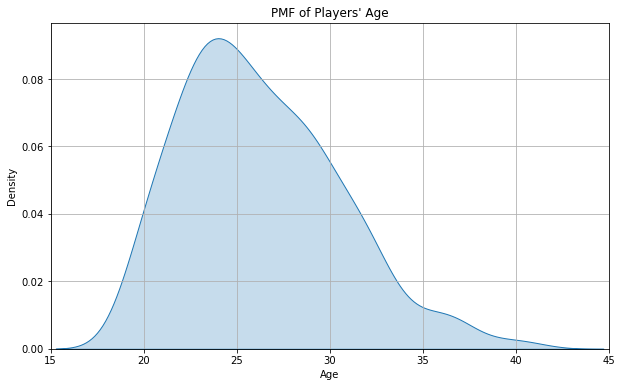

In [29]:
# probability mass function, S-total = 1
# When variables are continous, it becomes Probability Denstiy Function.

import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(df.Age, shade=True)
plt.xlim((15,45))
plt.title("PMF of Players' Age")
plt.ylabel("Density")
plt.xlabel('Age')
plt.grid(True)
plt.show()


# Analysis of country and salary

In [30]:
usa = df[df['NBA_Country'] == 'USA']
oversea = df[df['NBA_Country'] != 'USA']
usa_salary = usa[['Salary']] 
oversea_salary = oversea[['Salary']]

In [82]:
from scipy import stats
import scipy.stats

t, pval = scipy.stats.ttest_ind(usa_salary, oversea_salary)
print('t is',t)
print('p is',pval)


t is [-0.62892966]
p is [0.52969366]


p > 0.05 & |t-statistics| = 0.6 < |t-critical|, so we fail to reject the null. 
we can conclude that there is no significant difference of salaries between players from USA and overseas.

Q1: “what is the probability that players’ salaries are higher than 10 million dollars(all star), given that the player is from USA?”

Q2: “what is the probability that players’ salaries are higher than 10 million dollars, given that the player is not from USA?”

In [32]:
# Bayes Theorem

usa_list = usa['Salary'].values.tolist()
oversea_list = oversea['Salary'].values.tolist()


usa_count = usa['Salary'].count()
oversea_count = oversea['Salary'].count()

print('A total of {} players are from the United States'.format(usa_count))
print('A total of {} players are not from the United States'.format(oversea_count))

usa_10m_count = 0
oversea_10m_count = 0

for i in usa_list:
    if i > 10000000:
        usa_10m_count += 1

for i in oversea_list:
    if i > 10000000:
        oversea_10m_count += 1

# P(a|b) = (P(b|a))*P(a)/P(b)

probability_Q1 = (usa_10m_count/(usa_10m_count+oversea_10m_count)) * ((usa_10m_count + oversea_10m_count)/
            (usa_count + oversea_10m_count)) / (usa_count/(usa_count + oversea_10m_count))
print('The answer of Q1 is :', probability_Q1)

probability_Q2 = (oversea_10m_count/(usa_10m_count+oversea_10m_count)) * ((usa_10m_count + oversea_10m_count)/
            (usa_count + oversea_10m_count)) / (oversea_count/(usa_count + oversea_10m_count))
print('The answer of Q2 is :', probability_Q2)


A total of 372 players are from the United States
A total of 111 players are not from the United States
The answer of Q1 is : 0.23387096774193544
The answer of Q2 is : 0.28828828828828823


0    466
1     17
Name: Award, dtype: int64


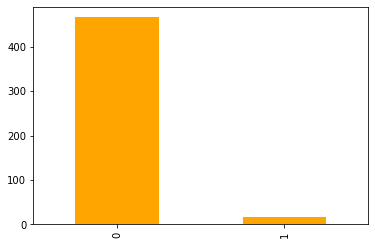

In [33]:
print(df.Award.value_counts())
p=df.Award.value_counts().plot(kind="bar", color='orange')

0    286
2     80
1     78
3     39
Name: Nominal, dtype: int64


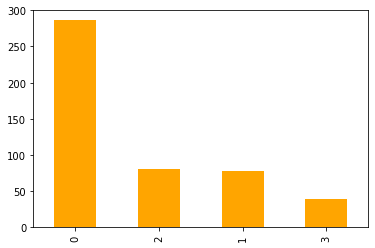

In [34]:
print(df.Nominal.value_counts())
p=df.Nominal.value_counts().plot(kind="bar", color='orange')

# Train set, valid set, test set

Spliting dataset into three parts, for training, validation, and testing respectively.

In [35]:
from sklearn.model_selection import train_test_split

x = df.iloc[:,2:28]
y = df.Salary

In [36]:
# test set
x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# train set & valid set
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=42)

In [37]:
print("the number of data for training: {}".format(len(y_train)))
print("the number of data for validation: {}".format(len(y_val)))
print("the number of data for testing: {}".format(len(y_test)))

the number of data for training: 289
the number of data for validation: 97
the number of data for testing: 97


# Deal with categorical data

In [38]:
# One-Hot Encoding for NBA_Country
ohe_NBA_Country = pd.get_dummies(df['NBA_Country'])
ohe_NBA_Country

,Argentina,Australia,Austria,Bahamas,Bosnia,Bosnia & Herz...,Brazil,Cameroon,Canada,China,Croatia,Czech Republic,Democratic Re...,Democratic Re_,Dominican Rep...,Egypt,Finland,France,Georgia,Germany,Greece,Haiti,Israel,Italy,Latvia,Lithuania,Mali,Montenegro,New Zealand,Poland,Puerto Rico,Russia,Senegal,Serbia,Slovenia,South Sudan,Spain,Sweden,Switzerland,Tunisia,Turkey,USA,Ukraine,United Kingdo...
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
479,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
480,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [39]:
# One-Hot Encoding for Industry
ohe_Tm = pd.get_dummies(df['Tm'])
ohe_Tm

,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,TOT,UTA,WAS
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
479,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
480,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
481,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [40]:
x_train = pd.merge(x_train, ohe_NBA_Country, left_index=True, right_index=True)
x_train.drop('NBA_Country', axis=1, inplace=True)

x_val = pd.merge(x_val, ohe_NBA_Country, left_index=True, right_index=True)
x_val.drop('NBA_Country', axis=1, inplace=True)

x_test = pd.merge(x_test, ohe_NBA_Country, left_index=True, right_index=True)
x_test.drop('NBA_Country', axis=1, inplace=True)

In [41]:
x_train = pd.merge(x_train, ohe_Tm, left_index=True, right_index=True)
x_train.drop('Tm', axis=1, inplace=True)

x_val = pd.merge(x_val, ohe_Tm, left_index=True, right_index=True)
x_val.drop('Tm', axis=1, inplace=True)

x_test = pd.merge(x_test, ohe_Tm, left_index=True, right_index=True)
x_test.drop('Tm', axis=1, inplace=True)

In [42]:
x_train

,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Argentina,Australia,Austria,Bahamas,Bosnia,Bosnia & Herz...,Brazil,Cameroon,Canada,China,Croatia,Czech Republic,Democratic Re...,Democratic Re_,Dominican Rep...,Egypt,Finland,France,Georgia,Germany,Greece,Haiti,Israel,Italy,Latvia,Lithuania,Mali,Montenegro,New Zealand,Poland,Puerto Rico,Russia,Senegal,Serbia,Slovenia,South Sudan,Spain,Sweden,Switzerland,Tunisia,Turkey,USA,Ukraine,United Kingdo...,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,TOT,UTA,WAS
469,31,25,71,2085,11.1,0.540,0.634,0.155,1.3,14.3,7.7,7.9,1.0,1.1,8.4,18.6,1.0,1.3,2.2,0.051,-0.3,-1.2,-1.5,0.3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31,18,23,50,584,10.4,0.459,0.265,0.108,2.9,11.6,7.3,21.9,1.9,1.4,13.4,16.3,0.0,0.6,0.6,0.052,-3.1,-0.2,-3.3,-0.2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
103,25,26,62,1732,13.6,0.615,0.515,0.090,1.7,8.3,4.9,8.4,1.4,0.7,7.6,15.7,2.8,1.5,4.3,0.118,1.3,-0.6,0.7,1.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
363,62,24,18,344,6.3,0.468,0.595,0.155,5.0,13.0,8.9,7.0,1.0,1.0,15.1,14.0,-0.2,0.2,0.0,0.005,-3.5,-0.2,-3.7,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
134,62,23,6,60,2.4,0.362,0.611,0.167,1.8,8.0,4.7,11.0,0.0,1.6,9.4,15.7,-0.2,0.0,-0.2,-0.134,-6.0,-4.1,-10.0,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,45,22,78,2220,9.1,0.526,0.343,0.187,2.3,10.1,6.1,8.4,1.5,0.7,12.8,17.9,-0.3,1.1,0.9,0.018,-2.2,-1.3,-3.4,-0.8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
331,13,20,16,118,10.7,0.415,0.000,0.000,11.1,24.3,17.4,11.5,0.9,4.8,16.3,18.6,-0.2,0.1,0.0,-0.020,-6.3,1.3,-5.1,-0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
62,62,26,48,474,14.9,0.589,0.078,0.478,14.4,19.9,17.1,3.8,2.1,4.7,18.7,15.9,0.6,0.9,1.4,0.144,-2.6,2.0,-0.5,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,16,23,77,1980,15.4,0.524,0.499,0.188,3.4,16.2,9.9,17.0,2.0,0.7,8.0,20.5,2.3,3.3,5.6,0.135,1.0,1.0,2.0,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
a = x_train.columns
b = x_val.columns
c = x_test.columns


In [44]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_train = pd.DataFrame(data=x_train, columns=a)


x_val = sc_X.fit_transform(x_val)
x_val = pd.DataFrame(data=x_val, columns=b)


x_test = sc_X.fit_transform(x_test)
x_test = pd.DataFrame(data=x_test, columns=c)


In [45]:
x_train

,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Argentina,Australia,Austria,Bahamas,Bosnia,Bosnia & Herz...,Brazil,Cameroon,Canada,China,Croatia,Czech Republic,Democratic Re...,Democratic Re_,Dominican Rep...,Egypt,Finland,France,Georgia,Germany,Greece,Haiti,Israel,Italy,Latvia,Lithuania,Mali,Montenegro,New Zealand,Poland,Puerto Rico,Russia,Senegal,Serbia,Slovenia,South Sudan,Spain,Sweden,Switzerland,Tunisia,Turkey,USA,Ukraine,United Kingdo...,ATL,BOS,BRK,CHI,CHO,CLE,DAL,DEN,DET,GSW,HOU,IND,LAC,LAL,MEM,MIA,MIL,MIN,NOP,NYK,OKC,ORL,PHI,PHO,POR,SAC,SAS,TOR,TOT,UTA,WAS
0,0.046781,-0.308570,0.877316,1.209611,-0.205669,0.100573,1.227214,-0.501928,-0.745769,-0.082547,-0.421896,-0.553759,-0.474251,-0.375890,-0.715921,-0.057211,-0.115013,0.166125,-0.056157,-0.131966,0.287389,-0.291938,0.101814,-0.230679,-0.083478,-0.145607,-0.058926,-0.058926,-0.058926,0.0,-0.11847,-0.083478,-0.157552,0.0,-0.11847,0.0,-0.083478,-0.058926,-0.058926,-0.058926,-0.058926,-0.157552,-0.058926,-0.11847,-0.083478,0.0,0.0,-0.058926,0.0,-0.058926,0.0,-0.058926,0.0,0.0,-0.058926,-0.058926,0.0,-0.083478,-0.058926,0.0,-0.11847,-0.058926,-0.058926,0.0,-0.11847,0.549365,0.0,-0.058926,-0.189321,-0.189321,7.536577,-0.189321,-0.189321,-0.11847,-0.189321,-0.179284,-0.189321,-0.16873,-0.179284,-0.198918,-0.179284,-0.179284,-0.189321,-0.179284,-0.16873,-0.132686,-0.16873,-0.16873,-0.132686,-0.189321,-0.157552,-0.179284,-0.157552,-0.145607,-0.189321,-0.198918,-0.371208,-0.189321,-0.157552
1,-0.578687,-0.763552,0.034576,-0.673900,-0.298088,-0.581638,-0.364856,-0.784504,-0.380469,-0.478192,-0.505926,0.910530,0.340496,-0.185641,0.030045,-0.440560,-0.657243,-0.532566,-0.665716,-0.124172,-0.345587,0.128441,-0.215523,-0.637181,-0.083478,-0.145607,-0.058926,-0.058926,-0.058926,0.0,-0.11847,-0.083478,6.347103,0.0,-0.11847,0.0,-0.083478,-0.058926,-0.058926,-0.058926,-0.058926,-0.157552,-0.058926,-0.11847,-0.083478,0.0,0.0,-0.058926,0.0,-0.058926,0.0,-0.058926,0.0,0.0,-0.058926,-0.058926,0.0,-0.083478,-0.058926,0.0,-0.11847,-0.058926,-0.058926,0.0,-0.11847,-1.820284,0.0,-0.058926,-0.189321,-0.189321,-0.132686,-0.189321,-0.189321,-0.11847,-0.189321,-0.179284,-0.189321,-0.16873,-0.179284,-0.198918,-0.179284,5.577734,-0.189321,-0.179284,-0.16873,-0.132686,-0.16873,-0.16873,-0.132686,-0.189321,-0.157552,-0.179284,-0.157552,-0.145607,-0.189321,-0.198918,-0.371208,-0.189321,-0.157552
2,-0.241897,-0.081078,0.516142,0.766654,0.124398,0.732250,0.713782,-0.892724,-0.654444,-0.961759,-1.010108,-0.501463,-0.112141,-0.629555,-0.835276,-0.540564,0.861002,0.365750,0.743889,0.390261,0.649090,-0.039711,0.489669,0.501024,-0.083478,-0.145607,-0.058926,-0.058926,-0.058926,0.0,-0.11847,-0.083478,-0.157552,0.0,-0.11847,0.0,-0.083478,-0.058926,-0.058926,-0.058926,-0.058926,-0.157552,-0.058926,-0.11847,-0.083478,0.0,0.0,-0.058926,0.0,-0.058926,0.0,-0.058926,0.0,0.0,-0.058926,-0.058926,0.0,-0.083478,-0.058926,0.0,-0.11847,-0.058926,-0.058926,0.0,-0.11847,0.549365,0.0,-0.058926,-0.189321,-0.189321,-0.132686,-0.189321,-0.189321,-0.11847,-0.189321,-0.179284,5.282045,-0.16873,-0.179284,-0.198918,-0.179284,-0.179284,-0.189321,-0.179284,-0.16873,-0.132686,-0.16873,-0.16873,-0.132686,-0.189321,-0.157552,-0.179284,-0.157552,-0.145607,-0.189321,-0.198918,-0.371208,-0.189321,-0.157552
3,1.538283,-0.536061,-1.249599,-0.975061,-0.839398,-0.505837,1.058946,-0.501928,0.098988,-0.273042,-0.169805,-0.647892,-0.474251,-0.439306,0.283674,-0.823908,-0.765689,-0.931817,-0.894301,-0.490510,-0.436012,0.128441,-0.286042,-0.555880,-0.083478,-0.145607,-0.058926,-0.058926,-0.058926,0.0,-0.11847,-0.083478,-0.157552,0.0,-0.11847,0.0,-0.083478,-0.058926,-0.058926,-0.058926,-0.058926,-0.157552,-0.058926,-0.11847,-0.083478,0.0,0.0,-0.058926,0.0,-0.058926,0.0,-0.058926,0.0,0.0,-0.058926,-0.058926,0.0,-0.083478,-0.058926,0.0,-0.11847,-0.058926,-0.058926,0.0,-0.11847,0.549365,0.0,-0.058926,-0.189321,-0.189321,-0.132686,-0.189321,-0.189321,-0.11847,5.282045,-0.179284,-0.18

# Feature selection

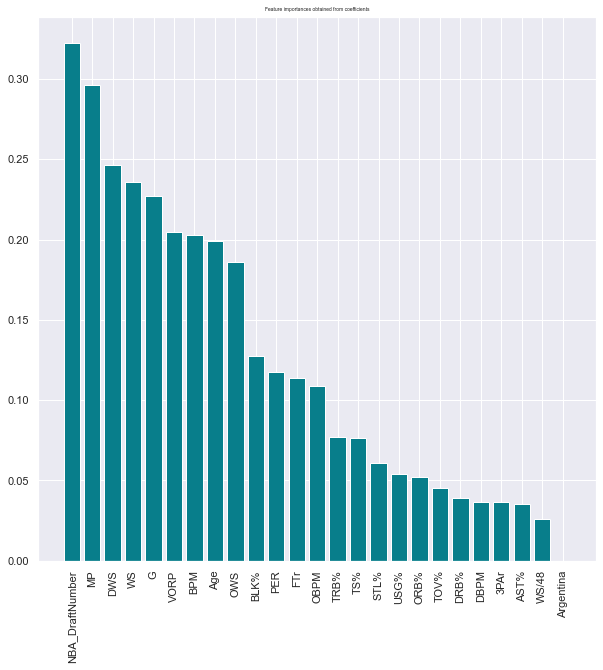

          Attribute  Importance
0   NBA_DraftNumber    0.322348
3                MP    0.296394
17              DWS    0.246465
18               WS    0.236134
2                 G    0.227065
23             VORP    0.204433
22              BPM    0.202617
1               Age    0.199031
16              OWS    0.185815
13             BLK%    0.127581
4               PER    0.117500
7               FTr    0.113561
20             OBPM    0.108670
10             TRB%    0.077255
5               TS%    0.076597
12             STL%    0.061134
15             USG%    0.053940
8              ORB%    0.052188
14             TOV%    0.045068
9              DRB%    0.039082
21             DBPM    0.036695
6              3PAr    0.036638
11             AST%    0.035208
19            WS/48    0.026310
24        Argentina    0.000000


In [900]:
from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.feature_selection import f_regression, mutual_info_regression

model = GenericUnivariateSelect(score_func=mutual_info_regression, mode='k_best', param=20)
model.fit(x_train,y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': model.scores_
})

importances=importances.iloc[0:25,:].sort_values(by='Importance',ascending=False)

plt.bar(x=importances['Attribute'],height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=5)
plt.xticks(rotation='vertical')
plt.show()
plt.rcParams['figure.figsize'] = (10.0, 10.0)

us=importances
print(us)


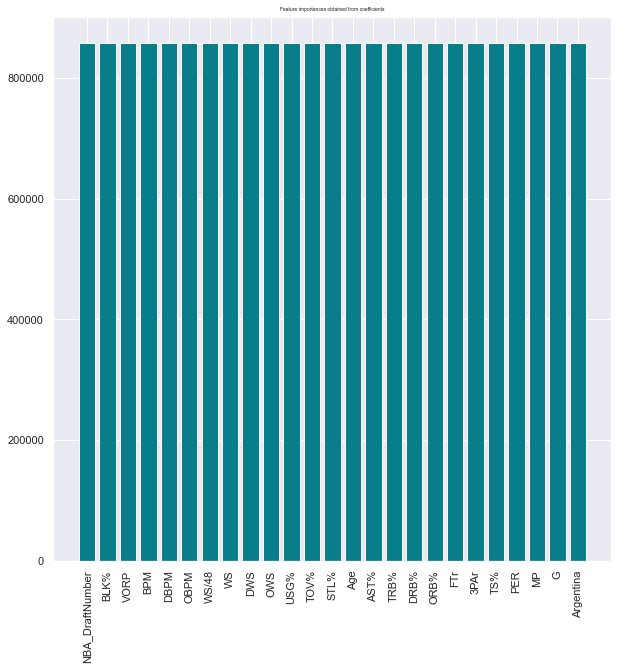

          Attribute    Importance
0   NBA_DraftNumber  858116.77986
13             BLK%  858116.77986
23             VORP  858116.77986
22              BPM  858116.77986
21             DBPM  858116.77986
20             OBPM  858116.77986
19            WS/48  858116.77986
18               WS  858116.77986
17              DWS  858116.77986
16              OWS  858116.77986
15             USG%  858116.77986
14             TOV%  858116.77986
12             STL%  858116.77986
1               Age  858116.77986
11             AST%  858116.77986
10             TRB%  858116.77986
9              DRB%  858116.77986
8              ORB%  858116.77986
7               FTr  858116.77986
6              3PAr  858116.77986
5               TS%  858116.77986
4               PER  858116.77986
3                MP  858116.77986
2                 G  858116.77986
24        Argentina  858116.77986


In [901]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression,Ridge,Lasso

model = LinearRegression()
model.fit(x_train,y_train)
importances = pd.DataFrame(data={
    'Attribute': x_train.columns,
    'Importance': abs(model.coef_[0])
})
importances=importances.iloc[0:25,:].sort_values(by='Importance',ascending=False)

plt.bar(x=importances['Attribute'],height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=5)
plt.xticks(rotation='vertical')
plt.show()
plt.rcParams['figure.figsize'] = (10.0, 10.0)

rf_perm=importances
print(rf_perm)


In [902]:
# Merge the two tables and create a new col with the value of adding the two cols and sorting
# Delete redundant columns

all = pd.concat([us,rf_perm],axis=1)
all.columns = ['Attribute1', 'Importance1', 'Attribute2', 'Importance2']
all['Importance_total'] = all['Importance1']+all['Importance2']
all = all.sort_values('Importance_total', ascending=False)
all.drop('Attribute2', axis=1, inplace=True)
all


,Attribute1,Importance1,Importance2,Importance_total
0,NBA_DraftNumber,0.322348,858116.77986,858117.102208
3,MP,0.296394,858116.77986,858117.076254
17,DWS,0.246465,858116.77986,858117.026325
18,WS,0.236134,858116.77986,858117.015994
2,G,0.227065,858116.77986,858117.006925
23,VORP,0.204433,858116.77986,858116.984293
22,BPM,0.202617,858116.77986,858116.982477
1,Age,0.199031,858116.77986,858116.978891
16,OWS,0.185815,858116.77986,858116.965675
13,BLK%,0.127581,858116.77986,858116.907441


In [904]:
# select top 20 features
select_feature = all.iloc[0:20,0:1]
select_feature = select_feature['Attribute1'].to_list()
select_feature

['NBA_DraftNumber',
 'MP',
 'DWS',
 'WS',
 'G',
 'VORP',
 'BPM',
 'Age',
 'OWS',
 'BLK%',
 'PER',
 'FTr',
 'OBPM',
 'TRB%',
 'TS%',
 'STL%',
 'USG%',
 'ORB%',
 'TOV%',
 'DRB%']

## Pearson's R-Square Correlation

In [905]:
y_train.index = range(0,289)
y_train

0      19332500
1       1524305
2       2500000
3       1312611
4         92160
         ...   
284      815615
285     2301360
286     3290000
287     1988520
288       50000
Name: Salary, Length: 289, dtype: int64

In [906]:
df_new = x_train[select_feature]
df_new['Salary']=y_train
df_new

,NBA_DraftNumber,MP,DWS,WS,G,VORP,BPM,Age,OWS,BLK%,PER,FTr,OBPM,TRB%,TS%,STL%,USG%,ORB%,TOV%,DRB%,Salary
0,0.046781,1.209611,0.166125,-0.056157,0.877316,-0.230679,0.101814,-0.308570,-0.115013,-0.375890,-0.205669,-0.501928,0.287389,-0.421896,0.100573,-0.474251,-0.057211,-0.745769,-0.715921,-0.082547,19332500
1,-0.578687,-0.673900,-0.532566,-0.665716,0.034576,-0.637181,-0.215523,-0.763552,-0.657243,-0.185641,-0.298088,-0.784504,-0.345587,-0.505926,-0.581638,0.340496,-0.440560,-0.380469,0.030045,-0.478192,1524305
2,-0.241897,0.766654,0.365750,0.743889,0.516142,0.501024,0.489669,-0.081078,0.861002,-0.629555,0.124398,-0.892724,0.649090,-1.010108,0.732250,-0.112141,-0.540564,-0.654444,-0.835276,-0.961759,2500000
3,1.538283,-0.975061,-0.931817,-0.894301,-1.249599,-0.555880,-0.286042,-0.536061,-0.765689,-0.439306,-0.839398,-0.501928,-0.436012,-0.169805,-0.505837,-0.474251,-0.823908,0.098988,0.283674,-0.273042,1312611
4,1.538283,-1.331435,-1.131443,-0.970496,-1.731164,-0.555880,-1.396720,-0.763552,-0.765689,-0.058808,-1.354303,-0.429782,-1.001169,-1.052124,-1.398608,-1.379524,-0.540564,-0.631612,-0.566728,-1.005719,92160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,0.720362,1.379014,-0.033501,-0.551424,1.158229,-1.124982,-0.233153,-0.991044,-0.819912,-0.629555,-0.469723,-0.309537,-0.142130,-0.758017,-0.017340,-0.021614,-0.173882,-0.517456,-0.059471,-0.697995,815615
285,-0.819252,-1.258654,-1.031630,-0.894301,-1.329860,-0.555880,-0.532859,-1.446026,-0.765689,1.970513,-0.258480,-1.433826,-1.068988,1.615839,-0.952222,-0.564778,-0.057211,1.491696,0.462706,1.382807,2301360
286,1.538283,-0.811932,-0.233127,-0.360937,-0.045685,-0.311979,0.278112,-0.081078,-0.331905,1.907097,0.296032,1.440025,-0.232555,1.552816,0.513269,0.521550,-0.507229,2.245128,0.820770,0.738051,3290000
287,-0.674913,1.077853,2.162383,1.239155,1.118099,1.151426,0.718857,-0.763552,0.589886,-0.629555,0.362046,-0.303525,0.581271,0.040271,-0.034185,0.431023,0.259468,-0.266312,-0.775599,0.195871,1988520


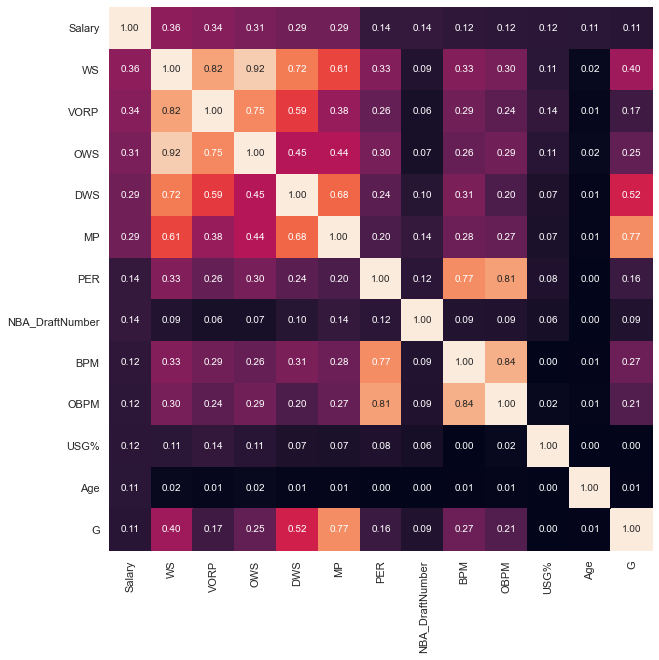

In [907]:
corrmat = df_new.corr(method='pearson', min_periods=1)
r_square = corrmat ** 2

## Top 12 correlated variables
k = 13 #number of variables for heatmap
cols = r_square.nlargest(k, 'Salary')['Salary'].index
cm = df_new[cols].corr()
cm_square = cm ** 2
f, ax = plt.subplots(figsize=(10, 10))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm_square, cbar=False, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


In [908]:
feature = cm_square.columns
feature 

Index(['Salary', 'WS', 'VORP', 'OWS', 'DWS', 'MP', 'PER', 'NBA_DraftNumber',
       'BPM', 'OBPM', 'USG%', 'Age', 'G'],
      dtype='object')

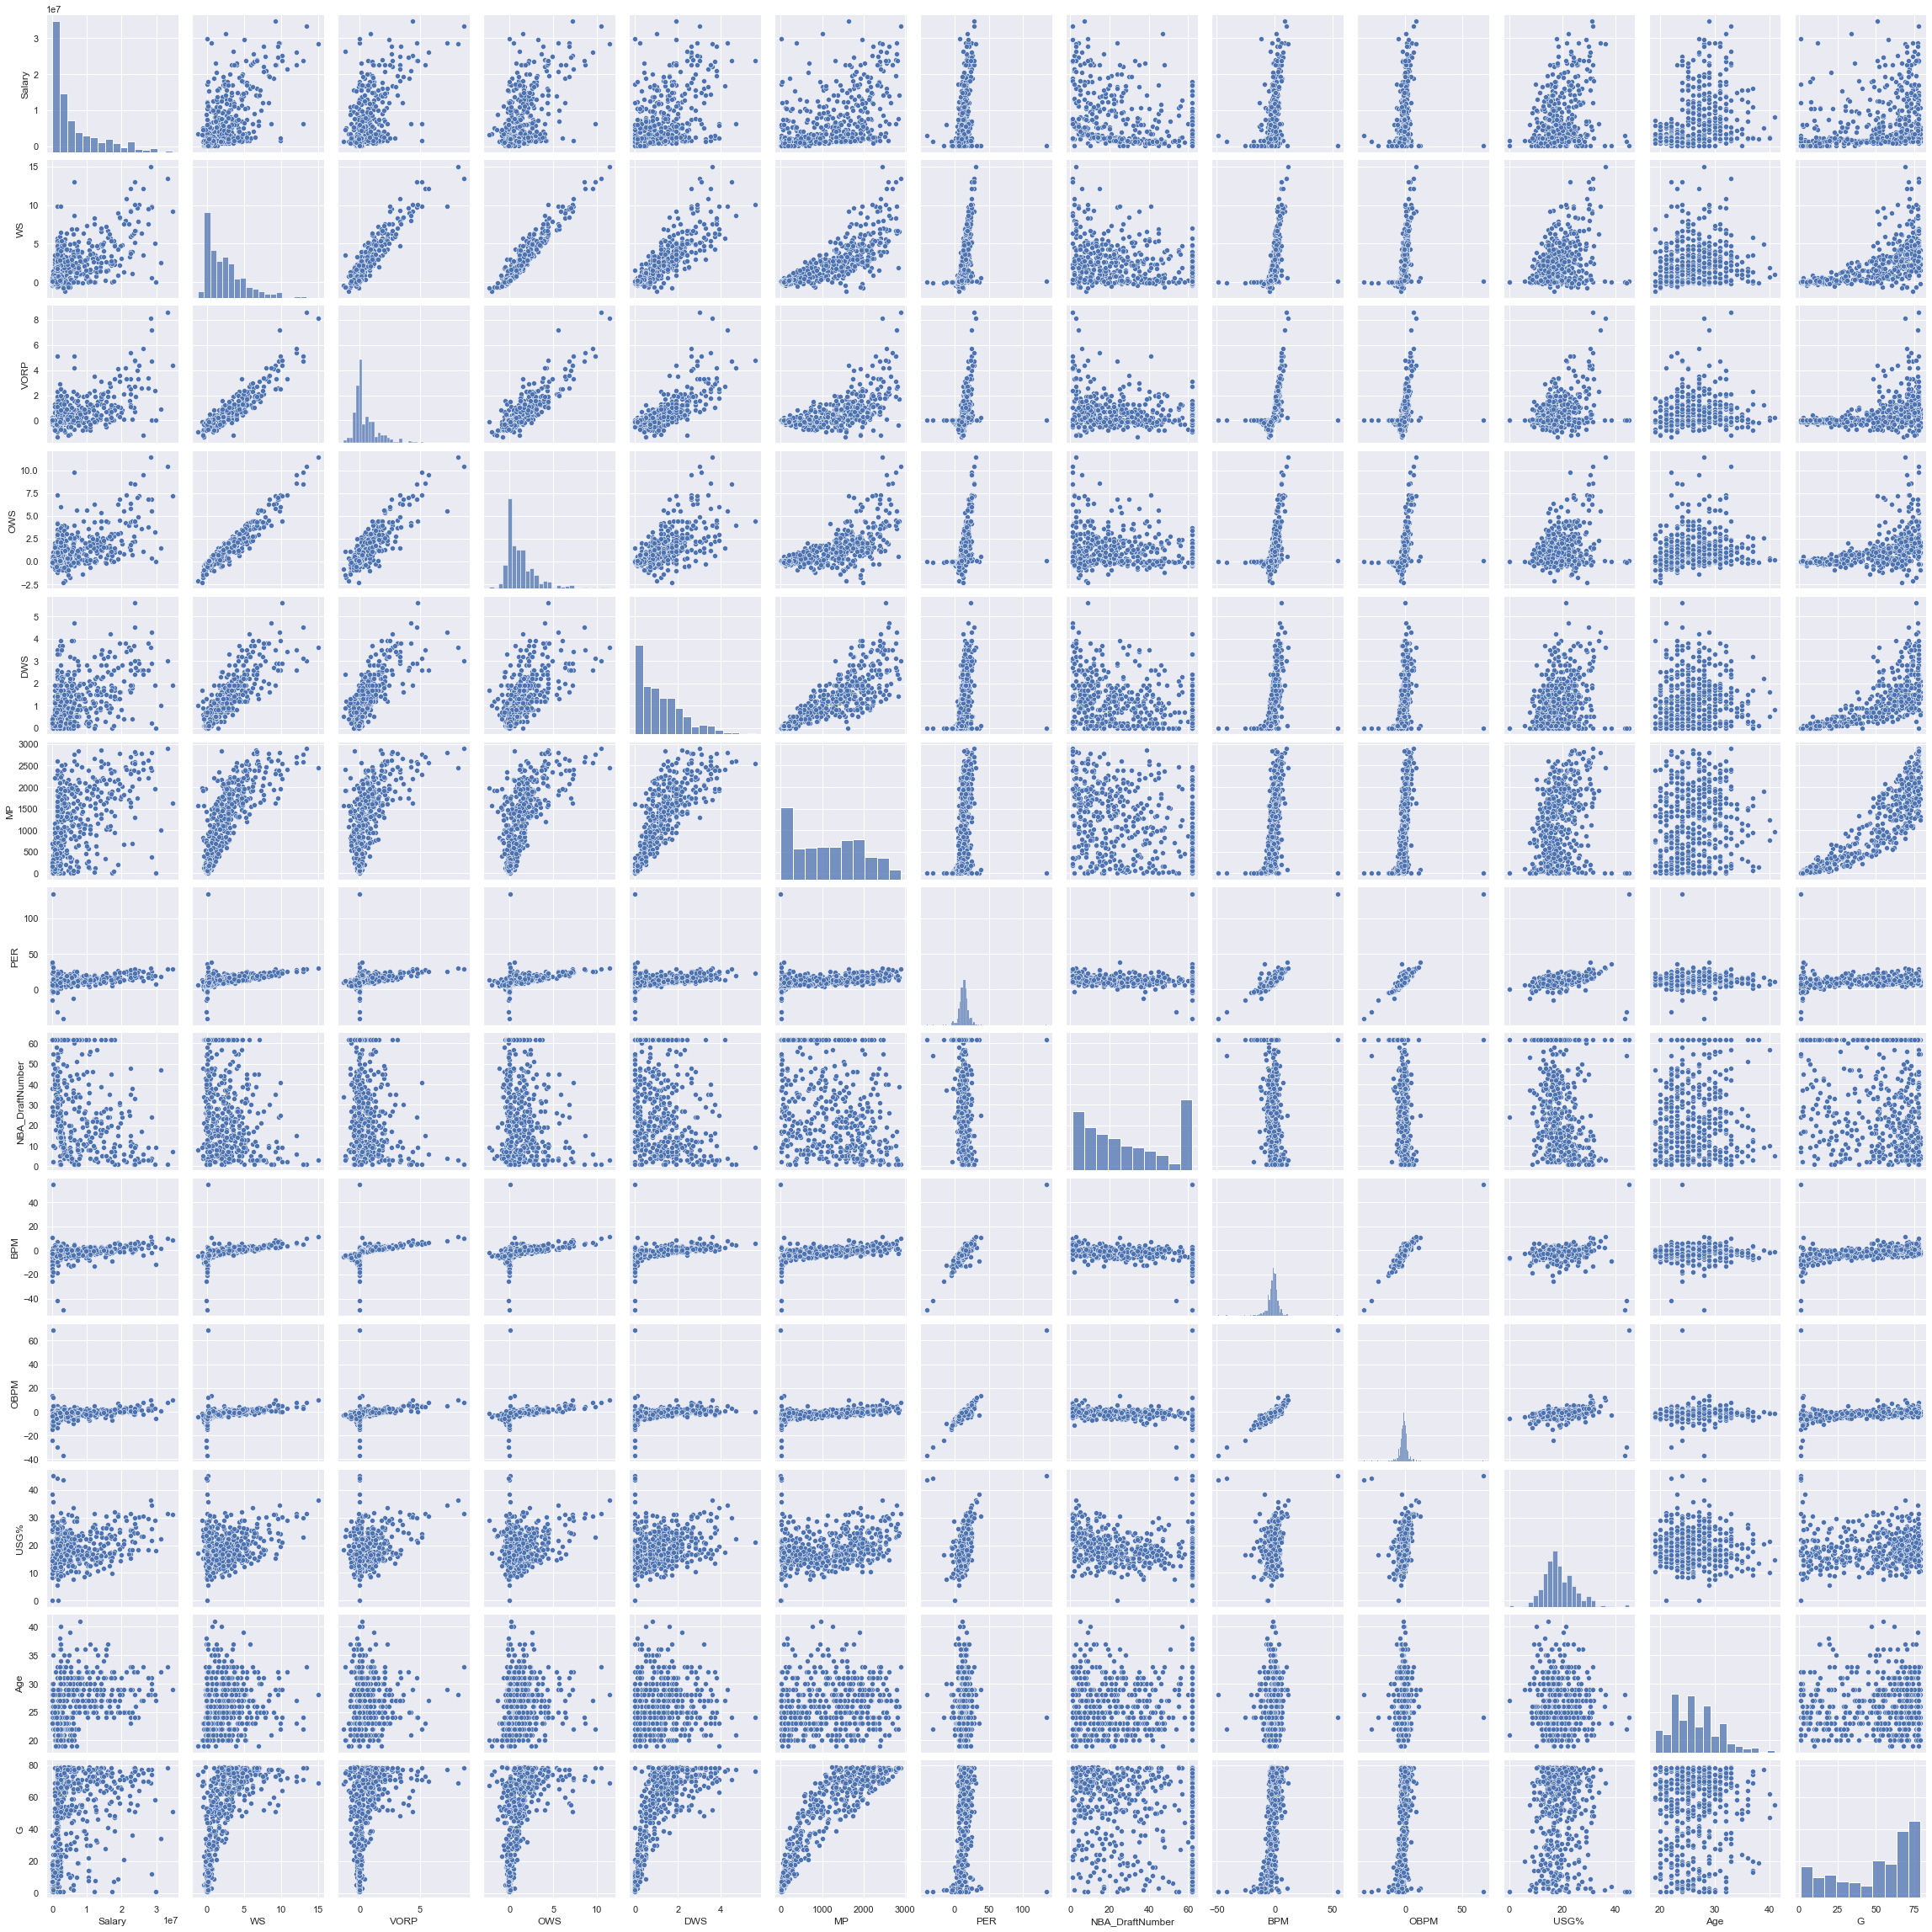

In [117]:
# Using scatter plots to detect the correlation value

sns.set()
sns.pairplot(df[feature], size = 2.5)
plt.show()

# Multicollinearity Analysis

Usually 10 is used as the judgment boundary. When Vif < 10, there is no multicollinearity; When 10 < = Vif < 100, there is strong multicollinearity; When Vif > = 100, there is severe multicollinearity.

In [47]:
x = df[['WS', 'VORP', 'OWS', 'DWS', 'MP', 'PER', 'NBA_DraftNumber',
       'BPM', 'OBPM', 'USG%', 'Age', 'G']]


from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,4840.2,WS
1,12.0,VORP
2,1891.3,OWS
3,903.1,DWS
4,30.1,MP
5,32.1,PER
6,3.4,NBA_DraftNumber
7,17.1,BPM
8,12.5,OBPM
9,29.4,USG%


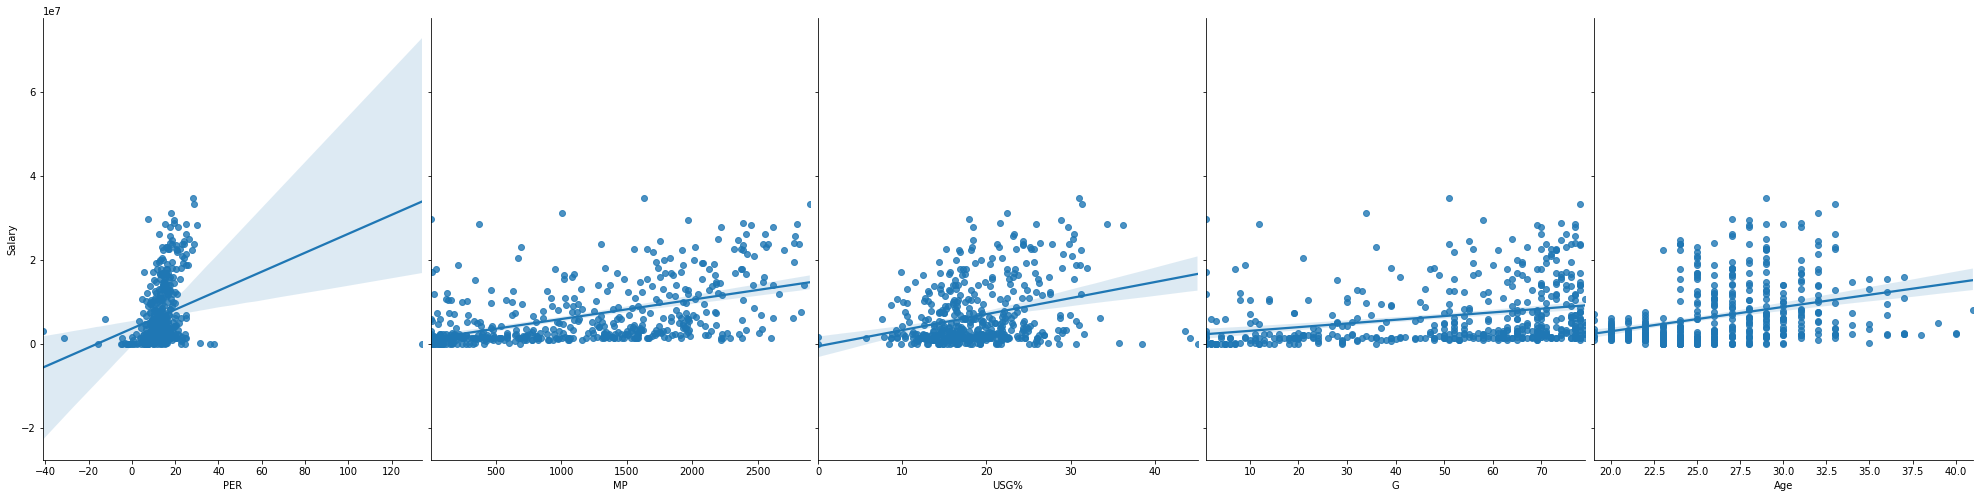

In [48]:
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(df, x_vars=['PER', 'MP', 'USG%', 'G', 'Age'], y_vars='Salary', size=7, aspect=0.8,kind = 'reg')
plt.show()


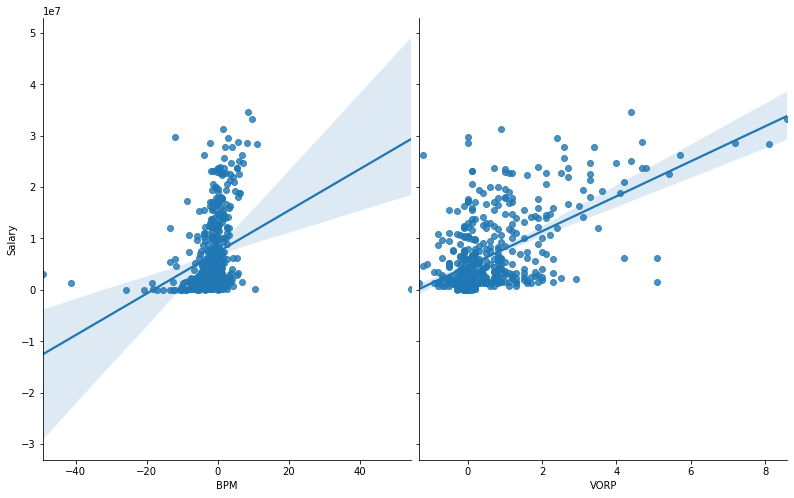

In [49]:
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(df, x_vars=['BPM', 'VORP'], y_vars='Salary', size=7, aspect=0.8,kind = 'reg')
plt.show()

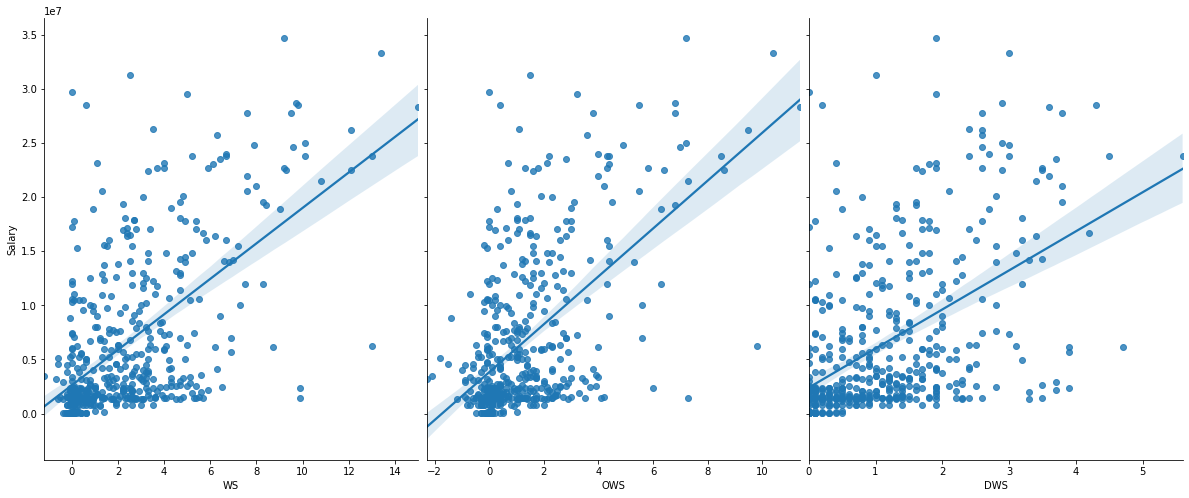

In [50]:
# 通过加入一个参数kind='reg'，seaborn可以添加一条最佳拟合直线和95%的置信带。
sns.pairplot(df, x_vars=['WS', 'OWS', 'DWS'], y_vars='Salary', size=7, aspect=0.8,kind = 'reg')
plt.show()

In [51]:
x = df[['WS', 'MP', 'NBA_DraftNumber', 'Age', 'BPM']]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

vif.round(1)

,VIF Factor,features
0,5.3,WS
1,7.6,MP
2,3.2,NBA_DraftNumber
3,7.2,Age
4,1.5,BPM


# Final feature selection

In [52]:
final_select_feature = vif['features'].to_list()
final_select_feature

['WS', 'MP', 'NBA_DraftNumber', 'Age', 'BPM']

In [53]:
x_train = x_train[final_select_feature]
x_val = x_val[final_select_feature]
x_test = x_test[final_select_feature]


In [54]:
x_train

,WS,MP,NBA_DraftNumber,Age,BPM
0,-0.056157,1.209611,0.046781,-0.308570,0.101814
1,-0.665716,-0.673900,-0.578687,-0.763552,-0.215523
2,0.743889,0.766654,-0.241897,-0.081078,0.489669
3,-0.894301,-0.975061,1.538283,-0.536061,-0.286042
4,-0.970496,-1.331435,1.538283,-0.763552,-1.396720
...,...,...,...,...,...
284,-0.551424,1.379014,0.720362,-0.991044,-0.233153
285,-0.894301,-1.258654,-0.819252,-1.446026,-0.532859
286,-0.360937,-0.811932,1.538283,-0.081078,0.278112
287,1.239155,1.077853,-0.674913,-0.763552,0.718857


# Model setup

# Regression

Root Mean Squrare Error(RMSE) is a measure of how far the predicted points away from the real points. Compared with MSE and MAE, RMSE can provide the same dimensionality with target variables, and the sqaure function can make the measurement more precise than MAE when comparing different models.

In [58]:
# RMSE & R sequare for testing data

def rmse_model(model, x_test, y_test):
    predictions = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(predictions, y_test))
    print('RMSE is', rmse)


In [918]:
# degree=1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Setup linear regression model
linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

rmse_model(linear_regression, x_test, y_test)

a = linear_regression.intercept_
b = linear_regression.coef_

print('Intercept:', a) 
print('Coefficient:', b)


RMSE is 5190346.767029234
Intercept: 6361606.505190312
Coefficient: [ 3179015.04893552   799145.35092725 -1599423.86819087  2002946.89421854
  -332555.03456922]


### Bias-Variance Trade-off

degree = 1, training RMSE = 5304531.89, validation RMSE = 5932168.51
degree = 2, training RMSE = 4679655.32, validation RMSE = 5771380.90
degree = 3, training RMSE = 4349456.85, validation RMSE = 5864256.51
degree = 4, training RMSE = 3500868.49, validation RMSE = 274481991.99
degree = 5, training RMSE = 1421476.95, validation RMSE = 2487533857.61
degree = 6, training RMSE = 0.00, validation RMSE = 12314360407.59
degree = 7, training RMSE = 0.00, validation RMSE = 177085991080.12


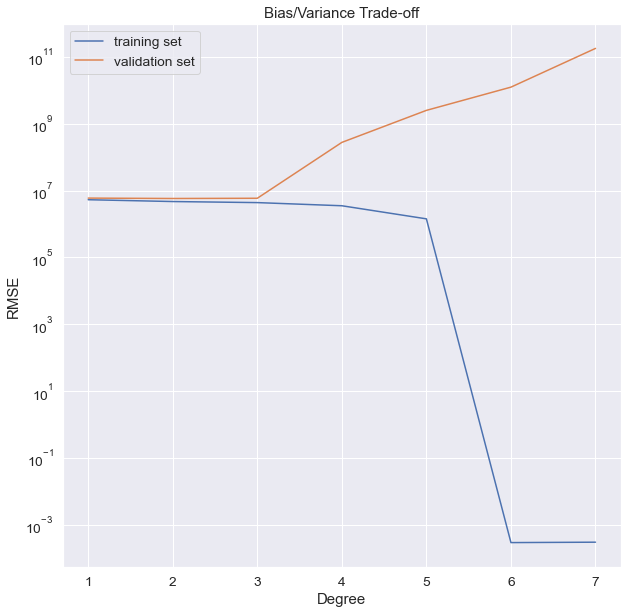

In [919]:
from sklearn.preprocessing import PolynomialFeatures

train_rmses = []
val_rmses = []
degrees = range(1,8)

for i in degrees:
    
    poly = PolynomialFeatures(degree=i, include_bias=False)
    x_train_poly = poly.fit_transform(x_train)

    poly_reg = LinearRegression()
    poly_reg.fit(x_train_poly, y_train)
    
    # training RMSE
    y_train_pred = poly_reg.predict(x_train_poly)
    train_poly_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    train_rmses.append(train_poly_rmse)
    
    # validation RMSE
    x_val_poly = poly.fit_transform(x_val)
    y_val_pred = poly_reg.predict(x_val_poly)
    
    val_poly_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    val_rmses.append(val_poly_rmse)

    print('degree = %s, training RMSE = %.2f, validation RMSE = %.2f' % (i, train_poly_rmse, val_poly_rmse))

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(degrees, train_rmses,label= 'training set')
ax.plot(degrees, val_rmses,label= 'validation set')
ax.set_yscale('log')

ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.set_title('Bias/Variance Trade-off')

plt.legend()
plt.show()


When degree=1, both training RMSE and validation RMSE are quite low. With the increase of degree, the difference of RMSE between training set and validation set becomes larger and larger. When degree>=4, the difference between training set's RMSE and validation set's RMSE is huge. 

degree<4, model does not cause high-bias.

In [921]:
# degree=2
second_poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = second_poly.fit_transform(x_train)
x_test_second_poly = second_poly.fit_transform(x_test)

second_reg = LinearRegression()
second_reg.fit(x_train_poly, y_train)

rmse_model(second_reg, x_test_second_poly, y_test)

a = second_reg.intercept_
b = second_reg.coef_

print('Intercept:', a) 
print('Coefficient:', b)


RMSE is 4718613.853493445
Intercept: 4979577.118203805
Coefficient: [ -791937.04065216  1603607.84324629 -2279538.01954516  3326991.40676009
  2600693.5540948   1226170.86477533  -540318.24772299  -498075.36490409
   580503.21161572 -2220940.1044918    625879.46007499   131739.73622051
   867012.89055992  3183893.28593236   434300.45057278   518047.94507213
   224246.14052467 -1165342.65835646   243822.02268729    49066.1028056 ]


In [922]:
# degree=4
poly = PolynomialFeatures(degree=4, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)

poly_reg = LinearRegression()
poly_reg.fit(x_train_poly, y_train)

rmse_model(poly_reg, x_test_poly, y_test)

a = poly_reg.intercept_
b = poly_reg.coef_

print('Intercept:', a) 
print('Coefficient:', b)


RMSE is 30456244.969787423
Intercept: 5571477.770128704
Coefficient: [ 2.15545556e+06 -4.36347612e+06 -1.89808509e+06  3.53503087e+06
  6.28267225e+06  1.38445545e+07 -1.80662750e+07  2.08692941e+06
  4.61410897e+06 -1.54718812e+07  3.51269608e+06 -2.93192648e+05
 -2.78416986e+06  2.16675436e+07 -3.49176209e+06  1.80874446e+05
 -5.34505916e+06 -7.31125190e+05 -2.69769107e+06 -7.26432692e+06
 -4.06428056e+06  6.28310182e+04 -1.09905161e+06  7.46482957e+06
  4.28184527e+06  4.99113663e+06  6.16764248e+06 -4.12805716e+06
  4.18224549e+06  3.41351173e+06 -2.96538454e+06 -1.21806410e+07
 -1.40902005e+06 -2.08782961e+07 -1.18997762e+07  7.71734950e+05
 -2.26915446e+06  9.31876094e+05 -4.96600377e+06 -1.77297794e+06
  1.27096575e+06 -3.85229716e+06 -5.72254567e+05  7.52455736e+06
 -7.11805600e+06 -7.29083166e+05 -1.16600615e+06 -1.01123279e+06
  3.04641578e+05  2.94451247e+06  1.73389569e+07 -3.30006166e+05
  6.88642891e+05  1.36829999e+07  1.68774000e+07  1.89859565e+06
  4.14853277e+05 -3.9

When degree=4, the model is overfitting

Solve overfiting: Ridge, Lasso, and ElasticNet Regularization

The meaning of regularization can be considered as 'punishiment'. When the model is too complex(overfitting), the values of coefficients are very large. So we introduce the l to make the coefficients smaller than before.

# Ridge

In [923]:
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet, ElasticNetCV

[41909165.630760655, 51091115.73247334, 51554337.96135595, 38095653.65343749, 9760536.195491694, 6972381.672346737, 6749336.119411493, 7132762.028361286, 7541273.301312409]


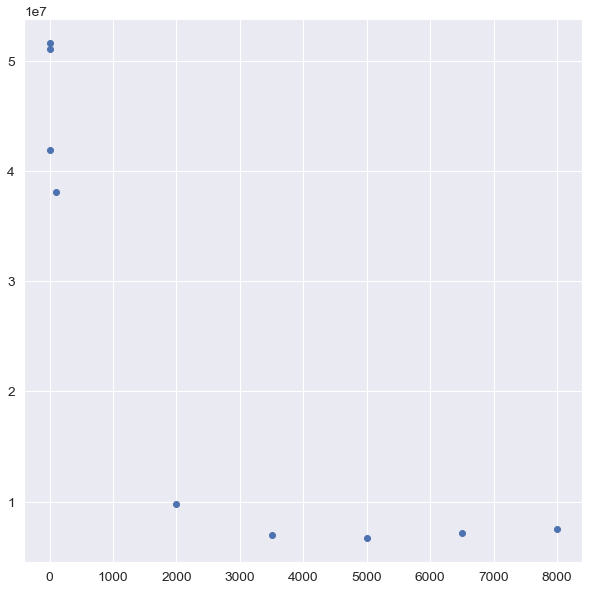

In [937]:
rmse=[]
alpha=[1, 5, 10, 100, 2000, 3500, 5000, 6500, 8000]

for a in alpha:
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)


[6714455.772796765, 6713237.459448274, 6712073.464759115, 6710963.236001695, 6709906.22457465, 6708901.885987532, 6707949.679845185, 6707049.06983191, 6706199.523695191, 6705400.513230033, 6704651.514262211, 6703952.006631922, 6703301.474177143, 6702699.404716683, 6702145.290033324, 6701638.625856509, 6701178.911845271, 6700765.651570527, 6700398.352497758, 6700076.525969064, 6699799.687185473, 6699567.355188869, 6699379.052843908, 6699234.30681975, 6699132.647571732, 6699073.609322889, 6699056.730045424, 6699081.551441885, 6699147.618926534, 6699254.481606324, 6699401.69226196, 6699588.807328842, 6699815.386877864, 6700080.994596169, 6700385.197767769, 6700727.567254201, 6701107.677475009, 6701525.106388176, 6701979.4354705075, 6702470.249697972, 6702997.137525883, 6703559.690869195, 6704157.505082568, 6704790.17894052, 6705457.314617457, 6706158.517667682, 6706893.397005387, 6707661.564884573, 6708462.636878975, 6709296.231861926, 6710161.9719862295, 6711059.482663971, 6711988.392546

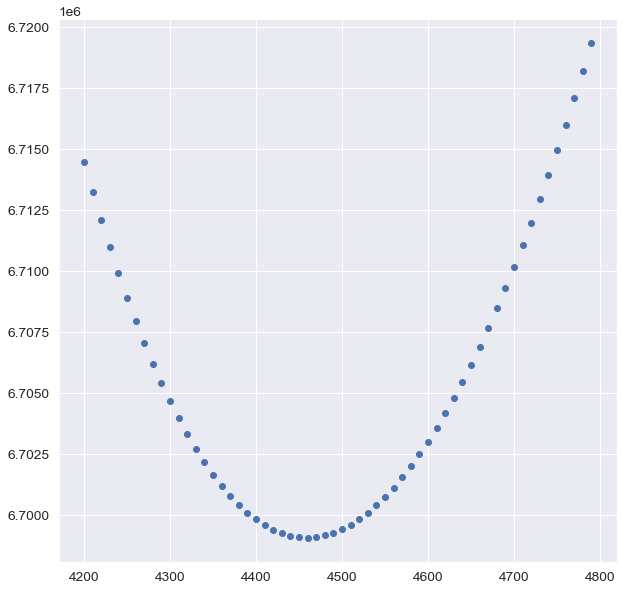

In [940]:
alpha=np.arange(4200, 4800, 10)
rmse=[]

for a in alpha:

    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)


[6699073.609322889, 6699070.031832523, 6699066.875468812, 6699064.139772167, 6699061.824283362, 6699059.92854354, 6699058.452094203, 6699057.3944773, 6699056.755235049, 6699056.533910073, 6699056.730045424, 6699057.343184421, 6699058.372870872, 6699059.818648861, 6699061.68006287, 6699063.956657794, 6699066.647978843, 6699069.753571614, 6699073.272982077, 6699077.205756615]


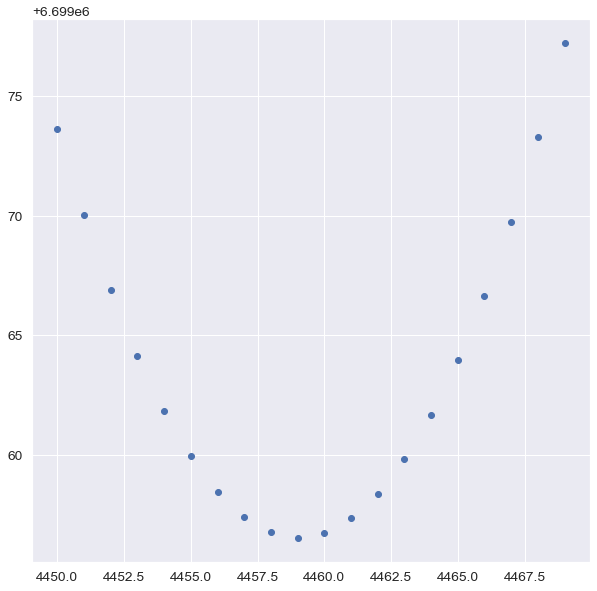

In [942]:
alpha=np.arange(4450, 4470, 1)
rmse=[]

for a in alpha:
    #ridge=Ridge(alpha=a, copy_X=True, fit_intercept=True)
    #ridge.fit(x_train, y_train)
    ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)


In [943]:
# Use alpha=2.40 to predict the test data

ridge = make_pipeline(PolynomialFeatures(4), Ridge(alpha=4459))
ridge_model = ridge.fit(x_train, y_train)

predictions = ridge_model.predict(x_test)
rmse_model(ridge_model, x_test, y_test)

RMSE is 6098052.11322881


# Lasso

[11916867.766566563, 11916951.86670777, 11917035.967463773, 11917120.068831742, 11917204.170812586, 11917288.27340905, 11917372.376616903, 11917456.480437987, 11917540.584874468, 11917624.689921817]


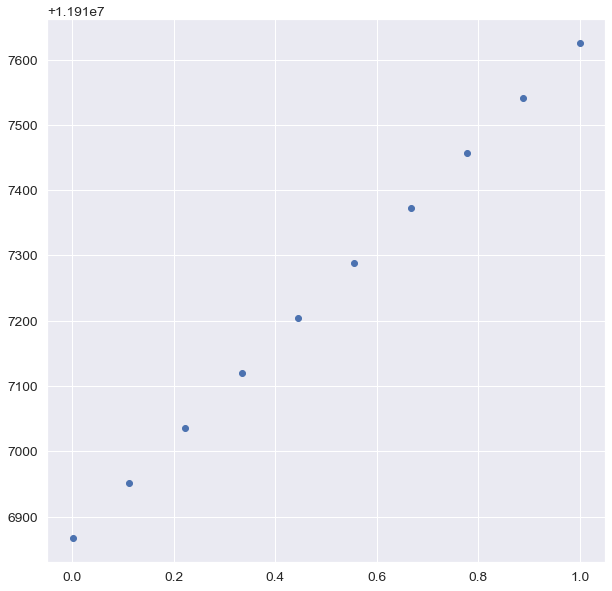

In [949]:
from sklearn.linear_model import Lasso

rmse=[]
alpha=np.linspace(0.001,1,10)

for a in alpha:
    lasso=make_pipeline(PolynomialFeatures(4), Lasso(alpha=a))
    lasso.fit(x_train, y_train)
    predict=lasso.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)

In [953]:
lasso = make_pipeline(PolynomialFeatures(4), Lasso(alpha=0.001))
lasso_model = lasso.fit(x_train, y_train)
predictions = lasso_model.predict(x_test)
rmse_model(lasso_model, x_test, y_test)

RMSE is 9579707.396787293


# ElasticNet

[29528585.95952429, 11432086.118071016, 7070642.302081688, 6736231.6187153105, 7132747.122829801, 7563532.338537208, 7894239.702994646, 8125875.604439982, 8281224.710644682, 8381189.501882995]


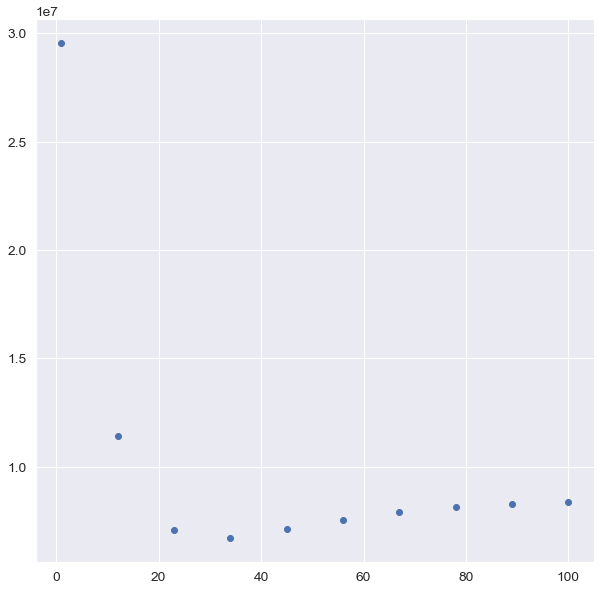

In [955]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

rmse=[]
alpha=np.linspace(1,100,10)

for a in alpha:
    elasticnet=make_pipeline(PolynomialFeatures(4), ElasticNet(alpha=a))
    elasticnet.fit(x_train, y_train)
    predict=elasticnet.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
                             
print(rmse)
plt.scatter(alpha, rmse)

[6878855.425935625, 6813827.623162875, 6765557.234084289, 6731682.954120461, 6710211.8920861455, 6699431.6548678875, 6697859.761089217, 6704203.242347808, 6717327.210314623, 6736231.6187153105]


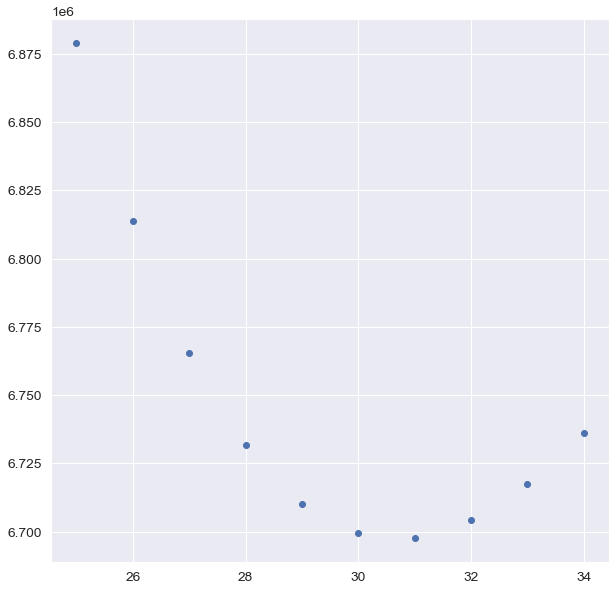

In [957]:
alpha=np.arange(25, 35, 1)
rmse=[]

for a in alpha:

    ridge = make_pipeline(PolynomialFeatures(4), ElasticNet(alpha=a))
    ridge.fit(x_train, y_train)
    predict=ridge.predict(x_val)
    rmse.append(np.sqrt(mean_squared_error(predict, y_val)))
print(rmse)
plt.scatter(alpha, rmse)


In [958]:
elasticnet=make_pipeline(PolynomialFeatures(4), ElasticNet(alpha=31))
elasticnet_model = elasticnet.fit(x_train, y_train)
predictions = elasticnet_model.predict(x_test)
rmse_model(elasticnet_model, x_test, y_test)

RMSE is 6098189.41164478


When degree=2, the model has the lowest RMSE, so 2nd-order polynomial regression performs the best.

In [960]:
my_ridge = Ridge(alpha = 4459, normalize = True)
my_ridge.fit(x_train, y_train) 
my_ridge.coef_

array([ 982.25406238,  878.10342616, -608.18951988,  551.8025791 ,
        575.14284507])

In [961]:
my_lasso = Lasso(alpha = 0.001, normalize = True)
my_lasso.fit(x_train, y_train) 
my_lasso.coef_

array([ 3179015.08347523,   799145.30721998, -1599423.85242018,
        2002946.87547614,  -332555.00817888])

In [962]:
my_elasticnet = ElasticNet(alpha = 31, normalize = True)
my_elasticnet.fit(x_train, y_train) 
my_elasticnet.coef_

array([ 977.70239672,  874.02836475, -605.34882768,  549.2193273 ,
        572.45383972])

In [963]:
# degree=2
second_poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = second_poly.fit_transform(x_train)
x_test_second_poly = second_poly.fit_transform(x_test)

second_reg = LinearRegression()
second_reg.fit(x_train_poly, y_train)

second_reg.coef_


array([ -791937.04065216,  1603607.84324629, -2279538.01954516,
        3326991.40676009,  2600693.5540948 ,  1226170.86477533,
        -540318.24772299,  -498075.36490409,   580503.21161572,
       -2220940.1044918 ,   625879.46007499,   131739.73622051,
         867012.89055992,  3183893.28593236,   434300.45057278,
         518047.94507213,   224246.14052467, -1165342.65835646,
         243822.02268729,    49066.1028056 ])

In [969]:
data = np.array([['','WS', 'MP', 'NBA_DraftNumber', 'Age', 'BPM'],
                ['Ridge', 982.25406238, 878.10342616, -608.18951988,  551.8025791 , 575.14284507],
                ['Lasso', 3179015.08347523, 799145.30721998, -1599423.85242018, 2002946.87547614, -332555.00817888],
                ['ElasticNet', 977.70239672, 874.02836475, -605.34882768, 549.2193273 , 572.45383972]])
                
regularization_comparison = pd.DataFrame(data=data[1:,1:],
                                      index=data[1:,0],
                                    columns=data[0,1:])
regularization_comparison


,WS,MP,NBA_DraftNumber,Age,BPM
Ridge,982.25406238,878.10342616,-608.18951988,551.8025791,575.14284507
Lasso,3179015.08347523,799145.30721998,-1599423.85242018,2002946.87547614,-332555.00817888
ElasticNet,977.70239672,874.02836475,-605.34882768,549.2193273,572.45383972


# Other regression models

In [970]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

folds = KFold(n_splits=5, shuffle=True, random_state=0)

# KNeighborsRegressor

In [973]:
knn = KNeighborsRegressor()
param_grid = [{'n_neighbors':np.arange(1, 100, 20),
               'weights':['uniform','distance']}]

knn = GridSearchCV( knn, param_grid, n_jobs = -1, cv = folds  )

knn.fit(x_train, y_train)
print('{}, {}'.format(knn.best_params_,knn.best_score_))


{'n_neighbors': 21, 'weights': 'distance'}, 0.4808980794645829


In [62]:
knn = KNeighborsRegressor(n_neighbors=21, weights='distance')
knn.fit(x_train, y_train)
predictions = knn.predict(x_test)
rmse_model(knn, x_test, y_test)

RMSE is 4972059.5269544


# DecisionTreeRegressor

In [975]:
dt = DecisionTreeRegressor(criterion="mse") 
param_grid = [{'max_depth':range(1,1000,20), 'min_samples_leaf':range(1,1000,20)}]

dt = GridSearchCV( dt, param_grid, n_jobs = 5, cv = folds )

dt.fit(x_train, y_train)
print('{}, {}'.format(dt.best_params_,dt.best_score_))


{'max_depth': 21, 'min_samples_leaf': 61}, 0.25593148823357936


In [976]:
dt = tree.DecisionTreeRegressor(max_depth=21, min_samples_leaf=61, criterion="mse") 
dt.fit(x_train, y_train)
predictions = dt.predict(x_test)
rmse_model(dt, x_test, y_test)


RMSE is 5928335.221525635


# SVM Regressor

In [56]:
from sklearn.svm import SVR

for k in ['linear', 'poly', 'rbf', 'sigmoid']:
    clf = SVR(kernel=k)
    clf.fit(x_train, y_train)
    confidence = clf.score(x_train, y_train)
    print(k, confidence)


linear -0.23316648440143384
poly -0.2331741286410507
rbf -0.2331954946445236
sigmoid -0.23319339666984829


In [978]:
svr = SVR(kernel='linear')

param_grid = [{'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
               'C':np.linspace(700000,200000,1000), 
               'gamma':[0.000001, 0.00001, 0.0001, 0.01, 0.1]}]

svr = GridSearchCV( svr, param_grid, n_jobs = -1, cv = folds )

svr.fit(x_train,y_train)
print('{}, {}'.format(svr.best_params_,svr.best_score_))
c

{'C': 687987.9879879879, 'gamma': 1e-06, 'kernel': 'linear'}, 0.4003066843030574


Index(['NBA_DraftNumber', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'Argentina',
       'Australia', 'Austria', 'Bahamas', 'Bosnia', 'Bosnia & Herz...',
       'Brazil', 'Cameroon', 'Canada', 'China', 'Croatia', 'Czech Republic',
       'Democratic Re...', 'Democratic Re_', 'Dominican Rep...', 'Egypt',
       'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Haiti', 'Israel',
       'Italy', 'Latvia', 'Lithuania', 'Mali', 'Montenegro', 'New Zealand',
       'Poland', 'Puerto Rico', 'Russia', 'Senegal', 'Serbia', 'Slovenia',
       'South Sudan', 'Spain', 'Sweden', 'Switzerland', 'Tunisia', 'Turkey',
       'USA', 'Ukraine', 'United Kingdo...', 'ATL', 'BOS', 'BRK', 'CHI', 'CHO',
       'CLE', 'DAL', 'DEN', 'DET', 'GSW', 'HOU', 'IND', 'LAC', 'LAL', 'MEM',
       'MIA', 'MIL', 'MIN', 'NOP', 'NYK', 'OKC', 'ORL', 'PHI', 'PHO', 'POR',
       'SAC'

In [59]:
svr = SVR(kernel='linear', C=687987.9879879879, gamma=1e-06)
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)

rmse_model(svr, x_test, y_test)


RMSE is 5333769.078025051


# XGBoost

In [980]:
from xgboost import XGBRegressor

xgb = XGBRegressor( silent=False, objective='reg:gamma')
param_grid = [{'max_depth':np.arange(0, 50, 5),
               'learning_rate':np.linspace(0.01,1,50)}]

xgb = GridSearchCV( xgb, param_grid, n_jobs = -1, cv = folds )

xgb.fit(x_train,y_train)
print('{}, {}'.format(xgb.best_params_,xgb.best_score_))


[14:05:35] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'learning_rate': 0.2524489795918367, 'max_depth': 5}, 0.4620597419013345


In [981]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate=0.656530612244898, max_depth=5, silent=False, objective='reg:gamma')
param_grid = [{'n_estimators':[1,20,50,80,100,200,300,500],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}]

xgb = GridSearchCV( xgb, param_grid, n_jobs = -1, cv = folds )

xgb.fit(x_train,y_train)
print('{}, {}'.format(xgb.best_params_,xgb.best_score_))


[14:06:43] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'gamma': 0.4, 'n_estimators': 50}, 0.4726321632925676


In [984]:
xgb = XGBRegressor(gamma=0.4, n_estimators=50, learning_rate=0.2524489795918367, 
                   max_depth=5, silent=False, objective='reg:gamma')
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)
rmse_model(xgb, x_test, y_test)


[14:08:39] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


RMSE is 9703833.427596912


In [985]:
data = np.array([['','Parameter','RMSE'],
                ['1st-order Poly',1,5190346.8],
                ['2nd-order Poly',2,4718613.9],
                ['4nd-order Poly',4,30456245.0],
                ['4nd-order Lasso',0.001,9579707.4],
                ['4nd-order Ridge',4459,6098052.1],
                ['4nd-order ElasticNet',31,6098189.4],
                ['KNeighborsRegressor','',4972059.5],
                ['DecisionTreeRegressor','',5928335.2],
                ['SVM Regressor','',5333769.1],
                ['xgboost regression','',9703833.4]])
                
RMSE_comparison = pd.DataFrame(data=data[1:,1:],
                                      index=data[1:,0],
                                    columns=data[0,1:])
RMSE_comparison



,Parameter,RMSE
1st-order Poly,1,5190346.8
2nd-order Poly,2,4718613.9
4nd-order Poly,4,30456245.0
4nd-order Lasso,0.001,9579707.4
4nd-order Ridge,4459,6098052.1
4nd-order ElasticNet,31,6098189.4
KNeighborsRegressor,,4972059.5
DecisionTreeRegressor,,5928335.2
SVM Regressor,,5333769.1
xgboost regression,,9703833.4


In [986]:
RMSE_comparison.loc['KNeighborsRegressor', 'Parameter'] = 'n_neighbors:21, weights:distance'
RMSE_comparison.loc['DecisionTreeRegressor', 'Parameter'] = 'max_depth:21, min_samples_leaf:61'
RMSE_comparison.loc['SVM Regressor', 'Parameter'] = 'C:687987.9, gamma:1e-06, kernel: linear'
RMSE_comparison.loc['xgboost regression', 'Parameter'] = 'gamma:0.4, n_estimators: 50, learning_rate:0.25, max_depth:5'

RMSE_comparison


,Parameter,RMSE
1st-order Poly,1,5190346.8
2nd-order Poly,2,4718613.9
4nd-order Poly,4,30456245.0
4nd-order Lasso,0.001,9579707.4
4nd-order Ridge,4459,6098052.1
4nd-order ElasticNet,31,6098189.4
KNeighborsRegressor,"n_neighbors:21, weights:distance",4972059.5
DecisionTreeRegressor,"max_depth:21, min_samples_leaf:61",5928335.2
SVM Regressor,"C:687987.9, gamma:1e-06, kernel: linear",5333769.1
xgboost regression,"gamma:0.4, n_estimators: 50, learning_rate:0.2...",9703833.4


# Classification 

In [987]:
x = df[['WS', 'MP', 'NBA_DraftNumber', 'Age', 'BPM', 'OBPM']]
y = df[['Nominal']]

# x_test,y_test不包含在train，val set中
x_model, x_test, y_model, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train, x_val, y_train, y_val = train_test_split(x_model, y_model, test_size=0.25, random_state=1)


# Naive Bayes

In [988]:
from sklearn.naive_bayes import GaussianNB

NB = GaussianNB()
NB.fit(x_train, y_train.values.ravel()) # 将多维数组降位一维

print(NB.score(x_train,y_train))

0.6228373702422145


Text(0, 0.5, 'Accuracy')

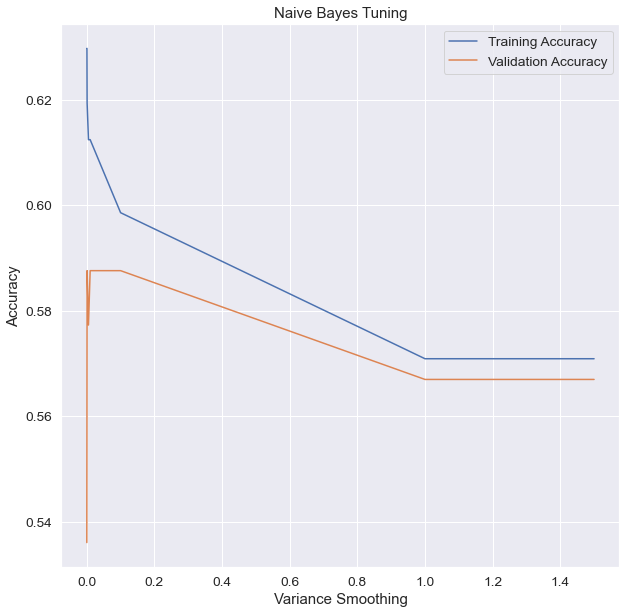

In [989]:
train_score = []
val_score = []
a = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 1, 1.5]

for i in a:
    NB = GaussianNB(priors=None, var_smoothing=i)
    NB.fit(x_train, y_train.values.ravel())
    train_score.append(NB.score(x_train, y_train))
    val_score.append(NB.score(x_val, y_val))

plt.plot(a,train_score)
plt.plot(a,val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Naive Bayes Tuning')
plt.xlabel('Variance Smoothing')
plt.ylabel('Accuracy')


In [990]:
final_nb = GaussianNB(priors=None, var_smoothing=0.10)
final_nb.fit(x_train, y_train.values.ravel())

print(final_nb.score(x_train,y_train))
print(final_nb.score(x_val,y_val))
print(final_nb.score(x_test, y_test)) 


0.5986159169550173
0.5876288659793815
0.6701030927835051


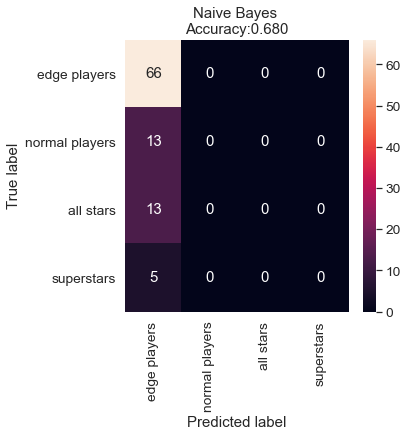

In [991]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

y_predict = NB.predict(x_test)
cm = confusion_matrix(y_test, y_predict) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players', 'all stars', 'superstars'], 
                     columns = ['edge players','normal players', 'all stars', 'superstars'])

plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True)
plt.title('Naive Bayes \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


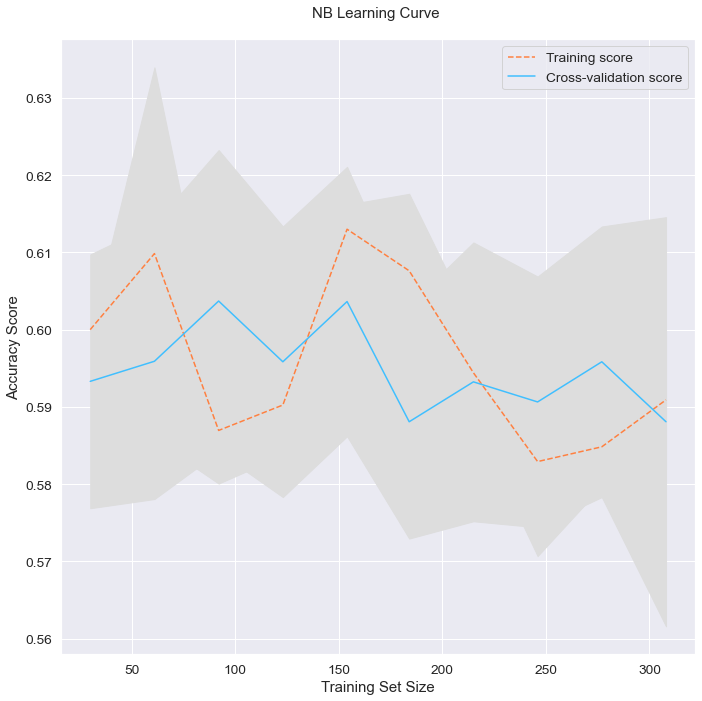

In [992]:
# Learning Curve
from sklearn.model_selection import learning_curve
from sklearn.multiclass import OneVsRestClassifier

# learning_curve: 该函数是用来画学习曲线，可以直接返回训练样本、训练集分数、验证/测试集分数
# 学习曲线就是通过画出不同训练集大小时训练集和交叉验证的准确率，可以看到模型在新数据上的表现，
# 进而来判断模型是否方差偏高或偏差过高，以及增大训练集是否可以减小过拟合。
train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(GaussianNB(priors=None, var_smoothing=0.1)), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        train_sizes=np.linspace(0.1, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("NB Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


# Logistic Regression

In [993]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(x_train, y_train.values.ravel())

print(lr.score(x_train,y_train))
print(lr.score(x_val,y_val))

0.6470588235294118
0.5257731958762887


Text(0, 0.5, 'Accuracy')

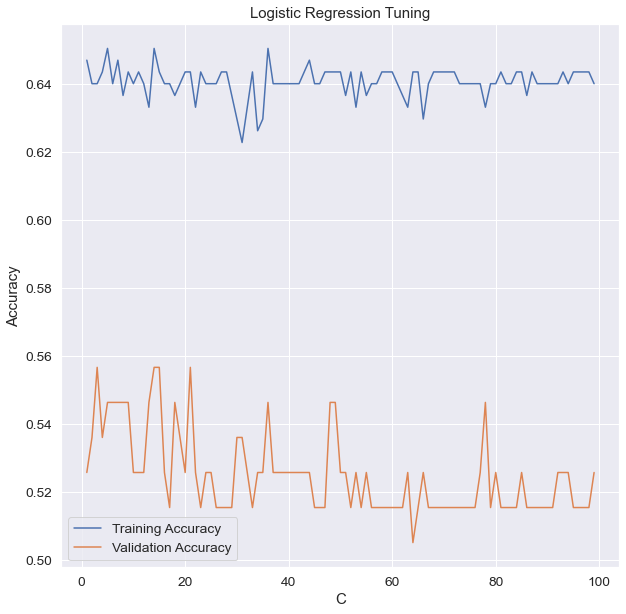

In [994]:
train_score = []
val_score=[]

for i in np.arange(1,100):
    
    lr = LogisticRegression(penalty = 'l2', C = i,random_state = 0)
    
    lr.fit(x_train,y_train.values.ravel()) 
    
    train_score.append(lr.score(x_train, y_train))
    val_score.append(lr.score(x_val,y_val))

    
plt.plot(np.arange(1,100),train_score)
plt.plot(np.arange(1,100),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Logistic Regression Tuning')
plt.xlabel('C')
plt.ylabel('Accuracy')



In [995]:
final_lr = LogisticRegression(penalty = 'l2', C = 21, random_state = 0)
final_lr.fit(x_train, y_train)
print(final_lr.score(x_train,y_train))
print(final_lr.score(x_val,y_val))

print(final_lr.score(x_test,y_test))


0.643598615916955
0.5567010309278351
0.6288659793814433


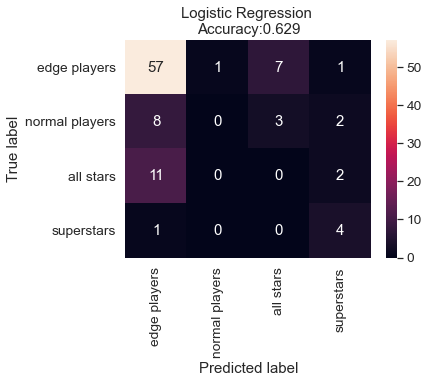

In [996]:
y_predict = final_lr.predict(x_test)
cm = confusion_matrix(y_test, y_predict) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players', 'all stars', 'superstars'], 
                     columns = ['edge players','normal players', 'all stars', 'superstars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Logistic Regression \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


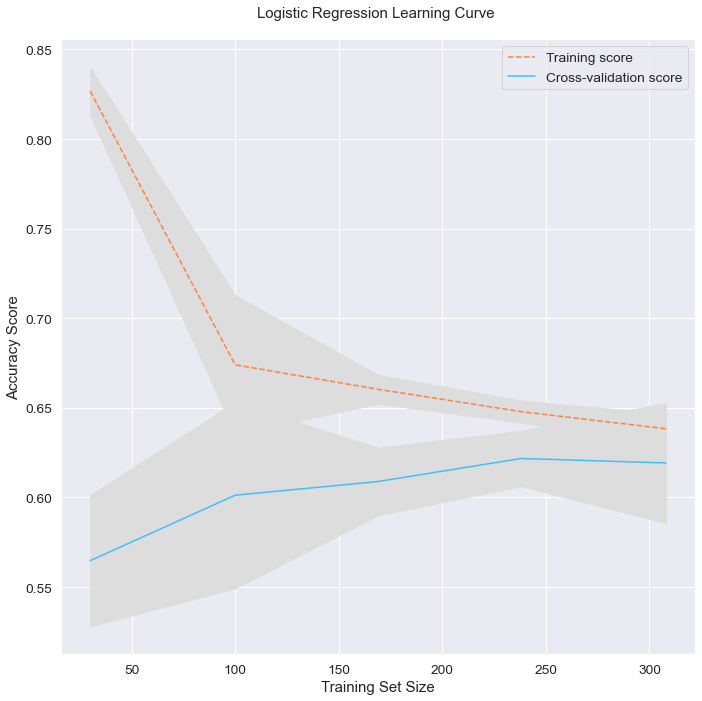

In [997]:
# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(LogisticRegression(penalty = 'l2', C = 21, random_state = 0)), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("Logistic Regression Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


# DecisionTreeClassifier

In [998]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
print(dt.score(x_train,y_train))
print(dt.score(x_val,y_val))


1.0
0.5567010309278351


Text(0.5, 1.0, 'Feature Importance')

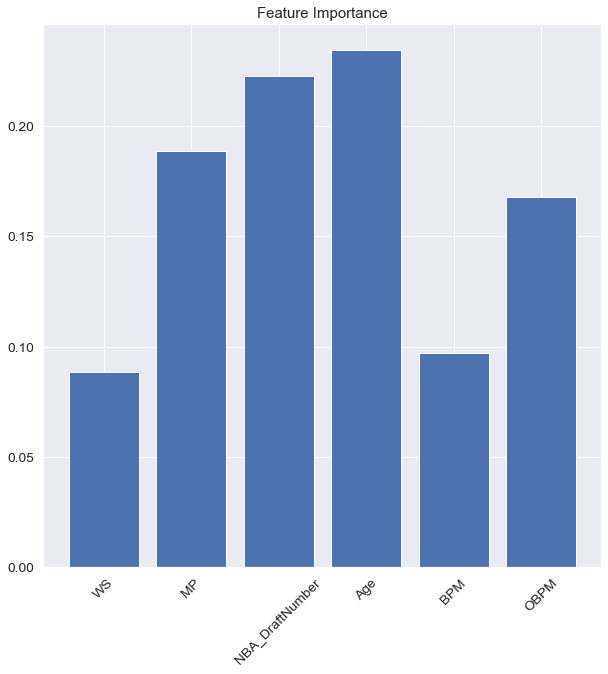

In [999]:
plt.bar(range(len(x_train.columns.values)), decision_tree_model.feature_importances_)
plt.xticks(range(len(x_train.columns.values)),x_train.columns.values, rotation= 45)
plt.title('Feature Importance')


Text(0, 0.5, 'Accuracy')

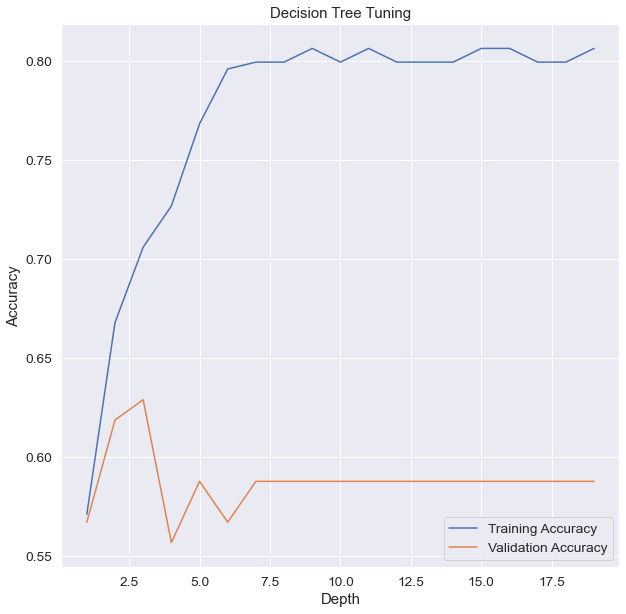

In [1000]:
#Model Tuning

train_score = []
val_score = []
for depth in np.arange(1,20):
    dt = DecisionTreeClassifier(max_depth = depth,min_samples_leaf = 5)
    dt.fit(x_train, y_train)
    train_score.append(dt.score(x_train, y_train))
    val_score.append(dt.score(x_val, y_val))

plt.plot(np.arange(1,20),train_score)
plt.plot(np.arange(1,20),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Decision Tree Tuning')
plt.xlabel('Depth')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

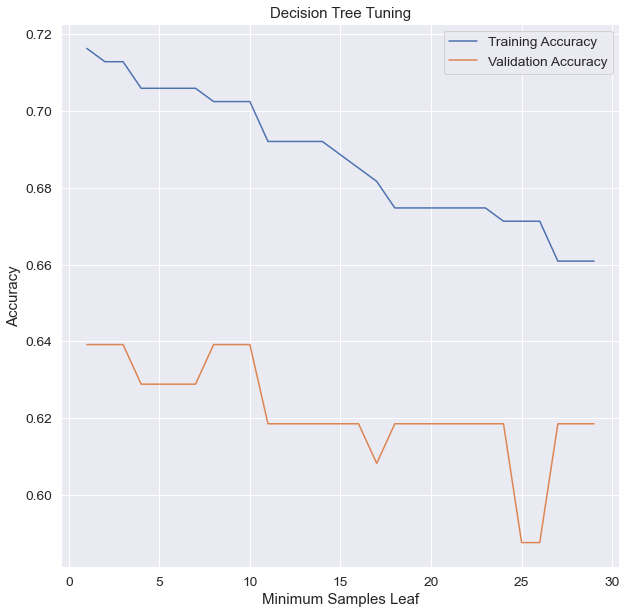

In [1001]:
train_score = []
val_score = []
for leaf in np.arange(1,30):
    dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = leaf)
    dt.fit(x_train, y_train)
    train_score.append(dt.score(x_train, y_train))
    val_score.append(dt.score(x_val, y_val))

plt.plot(np.arange(1,30),train_score)
plt.plot(np.arange(1,30),val_score)
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Decision Tree Tuning')
plt.xlabel('Minimum Samples Leaf')
plt.ylabel('Accuracy')


In [1002]:
final_dt = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10)
final_dt.fit(x_train, y_train)
print(final_dt.score(x_train,y_train))
print(final_dt.score(x_val,y_val))

print(final_dt.score(x_test,y_test))

0.7024221453287197
0.6391752577319587
0.7628865979381443


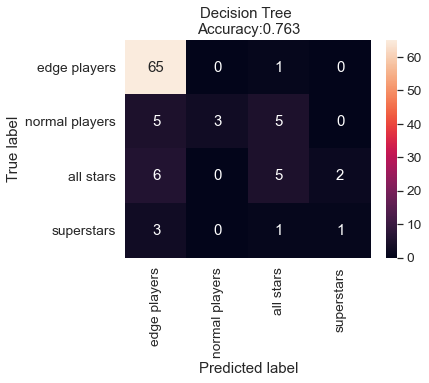

In [1003]:
y_predict = final_dt.predict(x_test)
cm = confusion_matrix(y_test, y_predict) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players', 'all stars', 'superstars'], 
                     columns = ['edge players','normal players', 'all stars', 'superstars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Decision Tree \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


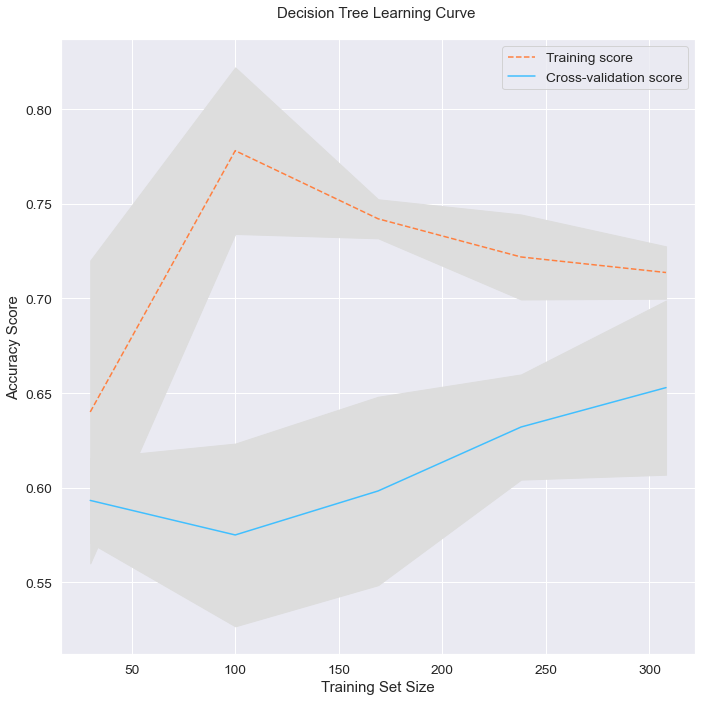

In [1004]:
# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 10)), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("Decision Tree Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()


# SVM

In [1005]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier

classifier = SVC(gamma = 'auto')
svm_model = OneVsRestClassifier(classifier, n_jobs=1).fit(x_train, y_train)

print(svm_model.score(x_train,y_train))
print(svm_model.score(x_val,y_val))


1.0
0.5670103092783505


[0.5979381443298969, 0.5670103092783505, 0.5463917525773195, 0.5567010309278351, 0.5670103092783505, 0.5670103092783505, 0.5670103092783505, 0.5670103092783505]


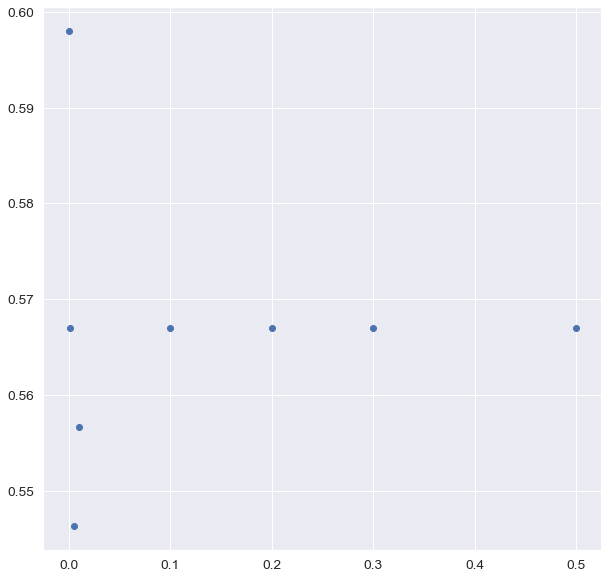

In [1006]:
#Tuning
accuracy=[]
gamma=[0.0001, 0.001, 0.005, 0.01, 0.1, 0.2, 0.3, 0.5]

for a in gamma:
    classifier = SVC(C=1, 
        kernel='rbf', 
        degree=2, 
        gamma=a, 
        coef0=1,
        shrinking=True, 
        tol=0.5,
        probability=False, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=-1, 
        decision_function_shape='ovr', 
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))
print(accuracy)
plt.scatter(gamma, accuracy)

[0.5979381443298969, 0.5876288659793815, 0.5567010309278351, 0.5670103092783505, 0.5360824742268041, 0.5257731958762887, 0.5463917525773195, 0.5463917525773195, 0.5463917525773195, 0.5463917525773195, 0.5463917525773195, 0.5463917525773195, 0.5567010309278351, 0.5567010309278351, 0.5463917525773195, 0.5463917525773195, 0.5463917525773195, 0.5463917525773195, 0.5360824742268041, 0.5360824742268041, 0.5360824742268041, 0.5360824742268041, 0.5360824742268041, 0.5463917525773195, 0.5360824742268041, 0.5360824742268041, 0.5463917525773195, 0.5567010309278351, 0.5567010309278351, 0.5567010309278351, 0.5567010309278351, 0.5567010309278351, 0.5567010309278351, 0.5567010309278351]


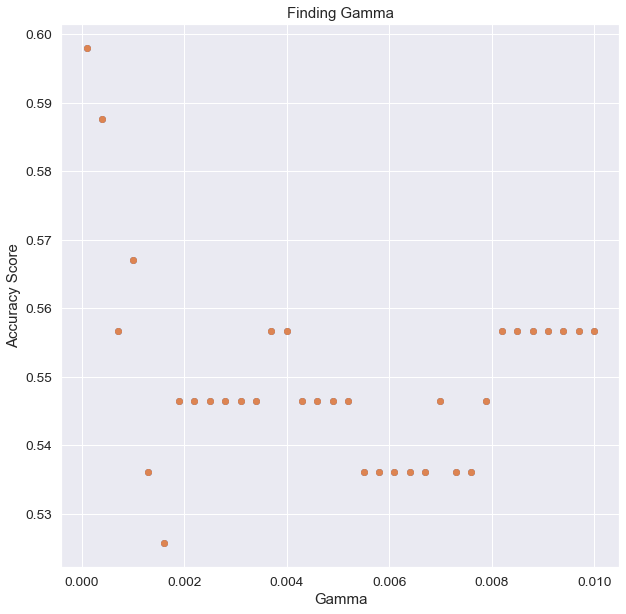

In [1007]:
gamma=np.arange(0.0001, 0.01, 0.0003) 
accuracy=[]

for a in gamma:
    classifier = SVC(C=1, 
        kernel='rbf', 
        degree=2, 
        gamma=a, 
        coef0=1,
        shrinking=True, 
        tol=0.5,
        probability=False, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=-1, 
        decision_function_shape='ovr', 
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))
print(accuracy)
plt.scatter(gamma, accuracy)
plt.scatter(gamma, accuracy)
plt.title("Finding Gamma")
plt.xlabel("Gamma")
plt.ylabel("Accuracy Score")
plt.show()


[0.5979381443298969, 0.5979381443298969, 0.5876288659793815, 0.5876288659793815, 0.5876288659793815, 0.6082474226804123, 0.5876288659793815, 0.5773195876288659, 0.5773195876288659]


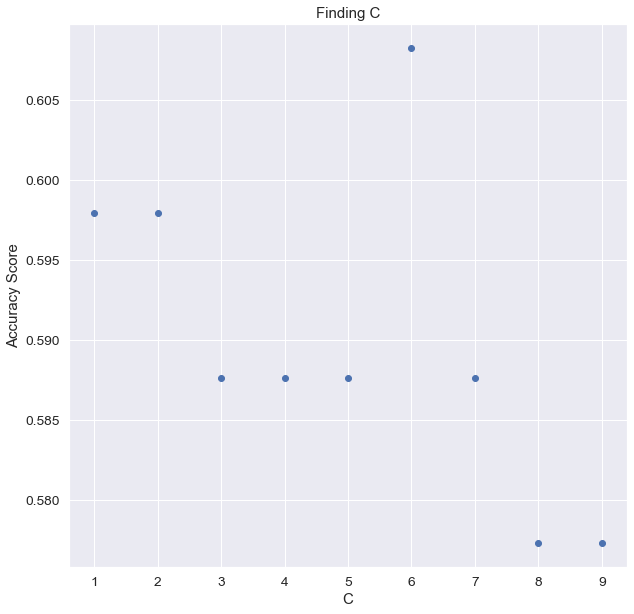

In [1008]:
accuracy=[]
C=np.arange(1,10,1) 

for a in C:
    classifier = SVC(C=a, 
        kernel='rbf', 
        degree=2, 
        gamma=0.0001, 
        coef0=1,
        shrinking=True, 
        tol=0.5,
        probability=False, 
        cache_size=200, 
        class_weight=None,
        verbose=False, 
        max_iter=-1, 
        decision_function_shape='ovr', 
        random_state=None)
    svm_model = OneVsRestClassifier(classifier, n_jobs=1)
    svm_model.fit(x_train, y_train)
    predict=svm_model.predict(x_val)
    accuracy.append(svm_model.score(x_val,y_val))
print(accuracy)
plt.scatter(C, accuracy)
plt.title("Finding C")
plt.xlabel("C")
plt.ylabel("Accuracy Score")
plt.show()


In [1009]:
classifier = SVC(C=6, # Regularization parameter
        kernel='rbf', # kernel type, rbf working fine here
        degree=2, # default value
        gamma=0.0001, # kernel coefficient
        coef0=1, # change to 1 from default value of 0.0
        shrinking=True, # using shrinking heuristics
        tol=0.5, # stopping criterion tolerance 
        probability=False, # no need to enable probability estimates
        cache_size=200, # 200 MB cache size
        class_weight=None, # all classes are treated equally 
        verbose=False, # print the logs 
        max_iter=-1, # no limit, let it run
        decision_function_shape='ovr', # will use one vs rest explicitly 
        random_state=None)
final_svm = OneVsRestClassifier(classifier, n_jobs=1).fit(x_train, y_train)

print(final_svm.score(x_train,y_train))
print(final_svm.score(x_val,y_val))

print(final_svm.score(x_test,y_test))


0.7093425605536332
0.6082474226804123
0.6804123711340206


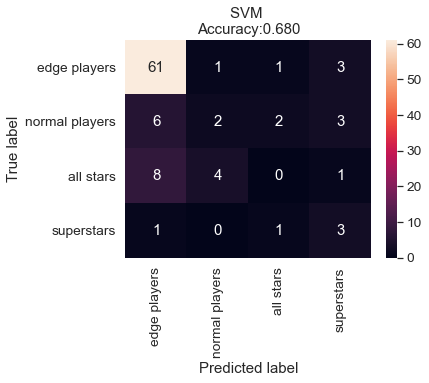

In [1010]:
y_predict = final_svm.predict(x_test)
cm = confusion_matrix(y_test, y_predict) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['edge players','normal players', 'all stars', 'superstars'], 
                     columns = ['edge players','normal players', 'all stars', 'superstars'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, y_predict)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


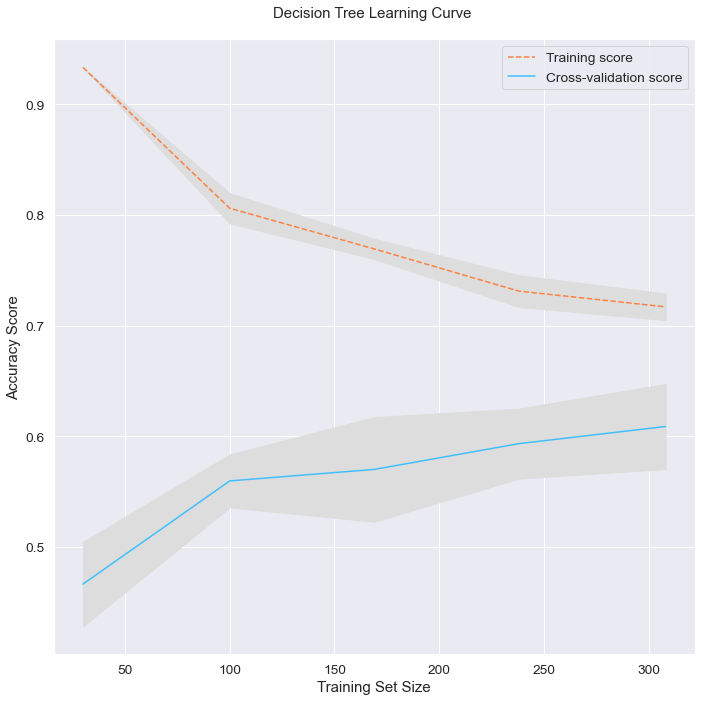

In [1011]:
# Learning Curve

train_sizes, train_scores, val_scores = learning_curve(OneVsRestClassifier(SVC(C=6, # Regularization parameter
        kernel='rbf', # kernel type, rbf working fine here
        degree=2, # default value
        gamma=0.0001, # kernel coefficient
        coef0=1, # change to 1 from default value of 0.0
        shrinking=True, # using shrinking heuristics
        tol=0.5, # stopping criterion tolerance 
        probability=False, # no need to enable probability estimates
        cache_size=200, # 200 MB cache size
        class_weight=None, # all classes are treated equally 
        verbose=False, # print the logs 
        max_iter=-1, # no limit, let it run
        decision_function_shape='ovr', # will use one vs rest explicitly 
        random_state=None)), 
        x_model, 
        y_model,
        # Number of folds in cross-validation
        cv=5,
        # Evaluation metric
        scoring='accuracy',
        # Use all computer cores
        # 50 different sizes of the training set
        train_sizes=np.linspace(0.1, 1.0, 5))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of validation set scores
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#ff8040",  label="Training score")
plt.plot(train_sizes, val_mean, color="#40bfff", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, color="#DDDDDD")

# Create plot
plt.title("Decision Tree Learning Curve \n ")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()
